# First Step

## Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import scipy.stats as stats
import seaborn as sns
sns.set_style('whitegrid')  #style list >  'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
from sklearn.model_selection import KFold
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Bayesian Optimization
from bayes_opt import BayesianOptimization

In [4]:
df = pd.read_csv(r"C:\Users\ASUS\Dataset atau Handson\project 3\Train.csv")
pd.set_option('display.max_columns', 100)

## Features Dictionary

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		3
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


In [7]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.drop(['Id'], axis = 1, inplace = True)

## Handling Missing Value

In [11]:
df['Alley'] = df['Alley'].fillna('None')

In [12]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,

In [13]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [14]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1

In [15]:
filtered_df = df[df['MasVnrArea'].isna() & df['MasVnrType'].notna()]

filtered_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,20,RL,NaN,32668,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,None,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,None,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,None,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [16]:
filtered_df 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,60,RL,NaN,7851,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,20,RL,NaN,32668,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,None,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,60,FV,65.0,8125,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,None,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,20,RL,67.0,10083,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,20,FV,95.0,11639,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,None,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,20,RL,107.0,13891,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,60,RL,75.0,9473,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [17]:
filtered_df_1 = df[(df['MasVnrArea'] == 0.0) & df['MasVnrType'].notna()]

In [18]:
filtered_df_1.value_counts(subset=['MasVnrType', 'MasVnrArea'])

MasVnrType  MasVnrArea
None        0.0           859
BrkFace     0.0             1
Stone       0.0             1
Name: count, dtype: int64

In [19]:
df.loc[:, 'MasVnrArea'] = df['MasVnrArea'].fillna(0.0)

In [20]:
df = df[~((df['MasVnrArea'] == 0.0) & (df['MasVnrType'].isin(['BrkFace', 'Stone'])))]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   int64  
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1199 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   Street         1458 non-null   object 
 5   Alley          1458 non-null   object 
 6   LotShape       1458 non-null   object 
 7   LandContour    1458 non-null   object 
 8   Utilities      1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   object 
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuilt    

In [22]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [23]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [24]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [25]:
df['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    219
Gd    134
Mn    114
Name: count, dtype: int64

In [26]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [27]:
df['BsmtFinSF1'].unique()

array([ 706,  978,  486,  216,  655,  732, 1369,  859,    0,  851,  906,
        998,  737,  733,  578,  646,  504,  840,  188,  234, 1218, 1277,
       1018, 1153, 1213,  731,  643,  967,  747,  280,  179,  456, 1351,
         24,  763,  182,  104, 1810,  384,  490,  649,  632,  941,  739,
        912, 1013,  603, 1880,  565,  320,  462,  228,  336,  448, 1201,
         33,  588,  600,  713, 1046,  648,  310, 1162,  520,  108,  569,
       1200,  224,  705,  444,  250,  984,   35,  774,  419,  170, 1470,
        938,  570,  300,  120,  116,  512,  567,  445,  695,  405, 1005,
        668,  821,  432, 1300,  507,  679, 1332,  209,  680,  716, 1400,
        416,  429,  222,   57,  660, 1016,  370,  351,  379, 1288,  360,
        639,  495,  288, 1398,  477,  831, 1904,  436,  352,  611, 1086,
        297,  626,  560,  390,  566, 1126, 1036, 1088,  641,  617,  662,
        312, 1065,  787,  468,   36,  822,  378,  946,  341,   16,  550,
        524,   56,  321,  842,  689,  625,  358,  4

In [28]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [29]:
df['BsmtFinSF2'].unique()

array([   0,   32,  668,  486,   93,  491,  506,  712,  362,   41,  169,
        869,  150,  670,   28, 1080,  181,  768,  215,  374,  208,  441,
        184,  279,  306,  180,  580,  690,  692,  228,  125, 1063,  620,
        175,  820, 1474,  264,  479,  147,  232,  380,  544,  294,  258,
        121,  391,  531,  344,  539,  713,  210,  311, 1120,  165,  532,
         96,  495,  174, 1127,  139,  202,  645,  123,  551,  219,  606,
        612,  480,  182,  132,  336,  468,  287,   35,  499,  723,  119,
         40,  117,  239,   80,  472,   64, 1057,  127,  630,  128,  377,
        764,  345, 1085,  435,  823,  500,  290,  324,  634,  411,  841,
       1061,  466,  396,  354,  149,  193,  273,  465,  400,  682,  557,
        230,  106,  791,  240,  547,  469,  177,  108,  600,  492,  211,
        168, 1031,  438,  375,  144,   81,  906,  608,  276,  661,   68,
        173,  972,  105,  420,  546,  334,  352,  872,  110,  627,  163,
       1029], dtype=int64)

In [30]:
df['BsmtUnfSF'].unique()

array([ 150,  284,  434,  540,  490,   64,  317,  216,  952,  140,  134,
        177,  175, 1494,  520,  832,  426,    0,  468,  525, 1158,  637,
       1777,  200,  204, 1566,  180,  486,  207,  649, 1228, 1234,  380,
        408, 1117, 1097,   84,  326,  445,  383,  167,  465, 1296,   83,
       1632,  736,  192,  612,  816,   32,  935,  321,  860, 1410,  148,
        217,  530, 1346,  576,  318, 1143, 1035,  440,  747,  701,  343,
        280,  404,  840,  724,  295, 1768,  448,   36, 1530, 1065,  384,
       1288,  684, 1013,  402,  635,  163,  168,  176,  370,  350,  381,
        410,  741, 1226, 1053,  641,  516,  793, 1139,  550,  905,  104,
        310,  252, 1125,  203,  728,  732,  510,  899, 1362,   30,  958,
        556,  413,  479,  297,  658,  262,  891, 1304,  519, 1907,  336,
        107,  432,  403,  811,  396,  970,  506,  884,  400,  896,  253,
        409,   93, 1200,  572,  774,  769, 1335,  340,  882,  779,  112,
        470,  294, 1686,  360,  441,  354,  700,  7

In [31]:
df.groupby(df['BsmtQual'].isna())[['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].count()

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
BsmtQual,,,,
False,1421,1420,1421,1420
True,0,0,0,0


In [32]:
df[(df['BsmtQual'].notna()) & (df['BsmtCond'].notna()) & (df['BsmtExposure'].isna())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,60,RL,65.0,14006,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500


In [33]:
df.loc[(df['BsmtQual'].notna()) & (df['BsmtCond'].notna()) & (df['BsmtExposure'].isna()), 'BsmtExposure'] = "None"

In [34]:
df['BsmtExposure'].value_counts(dropna=False)

BsmtExposure
No      953
Av      219
Gd      134
Mn      114
NaN      37
None      1
Name: count, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   int64  
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1199 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   Street         1458 non-null   object 
 5   Alley          1458 non-null   object 
 6   LotShape       1458 non-null   object 
 7   LandContour    1458 non-null   object 
 8   Utilities      1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   object 
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuilt    

In [36]:
df[(df['BsmtQual'].notna()) & (df['BsmtCond'].notna()) & (df['BsmtFinType2'].isna())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,20,RL,85.0,10655,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000


In [37]:
df.groupby('BsmtFinType2')['BsmtFinSF2'].mean()

BsmtFinType2
ALQ    626.157895
BLQ    329.909091
GLQ    658.000000
LwQ    310.739130
Rec    392.462963
Unf      0.000000
Name: BsmtFinSF2, dtype: float64

In [38]:
df.groupby('BsmtFinType2')['BsmtFinSF2'].median()

BsmtFinType2
ALQ    606.0
BLQ    294.0
GLQ    623.0
LwQ    277.5
Rec    320.0
Unf      0.0
Name: BsmtFinSF2, dtype: float64

In [39]:
df = df.drop(df[(df['BsmtFinType2'].isna()) & (df['BsmtFinSF2'] > 0)].index)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1457 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1457 non-null   int64  
 1   MSZoning       1457 non-null   object 
 2   LotFrontage    1198 non-null   float64
 3   LotArea        1457 non-null   int64  
 4   Street         1457 non-null   object 
 5   Alley          1457 non-null   object 
 6   LotShape       1457 non-null   object 
 7   LandContour    1457 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1457 non-null   object 
 10  LandSlope      1457 non-null   object 
 11  Neighborhood   1457 non-null   object 
 12  Condition1     1457 non-null   object 
 13  Condition2     1457 non-null   object 
 14  BldgType       1457 non-null   object 
 15  HouseStyle     1457 non-null   object 
 16  OverallQual    1457 non-null   int64  
 17  OverallCond    1457 non-null   int64  
 18  YearBuilt    

In [41]:
df_basement_1 = df[['BsmtFinType1', 'BsmtFinSF1']]

In [42]:
df_basement_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1457 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtFinType1  1420 non-null   object
 1   BsmtFinSF1    1457 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.1+ KB


In [43]:
df_basement_1[(df_basement_1['BsmtFinType1'].isna()) & (df_basement_1['BsmtFinSF1'].notna())]

,BsmtFinType1,BsmtFinSF1
17,NaN,0
39,NaN,0
90,NaN,0
102,NaN,0
156,NaN,0
182,NaN,0
259,NaN,0
342,NaN,0
362,NaN,0
371,NaN,0


In [44]:
df.loc[:, 'BsmtQual'] = df['BsmtQual'].fillna('None')
df.loc[:, 'BsmtCond'] = df['BsmtCond'].fillna('None')
df.loc[:, 'BsmtExposure'] = df['BsmtExposure'].fillna('None')
df.loc[:, 'BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df.loc[:, 'BsmtFinType2'] = df['BsmtFinType1'].fillna('None')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1457 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1457 non-null   int64  
 1   MSZoning       1457 non-null   object 
 2   LotFrontage    1198 non-null   float64
 3   LotArea        1457 non-null   int64  
 4   Street         1457 non-null   object 
 5   Alley          1457 non-null   object 
 6   LotShape       1457 non-null   object 
 7   LandContour    1457 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1457 non-null   object 
 10  LandSlope      1457 non-null   object 
 11  Neighborhood   1457 non-null   object 
 12  Condition1     1457 non-null   object 
 13  Condition2     1457 non-null   object 
 14  BldgType       1457 non-null   object 
 15  HouseStyle     1457 non-null   object 
 16  OverallQual    1457 non-null   int64  
 17  OverallCond    1457 non-null   int64  
 18  YearBuilt    

In [46]:
df = df.drop(df[df['Electrical'].isna()].index)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          1456 non-null   object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64  
 17  OverallCond    1456 non-null   int64  
 18  YearBuilt    

In [48]:
df_fireplace = df[['Fireplaces', 'FireplaceQu']]

In [49]:
df_fireplace[(df_fireplace['Fireplaces'] == 0) & (df_fireplace['FireplaceQu'].isna())]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


In [50]:
len(df_fireplace[(df_fireplace['Fireplaces'] == 0) & (df_fireplace['FireplaceQu'].isna())])

688

In [51]:
df.loc[:, 'FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          1456 non-null   object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64  
 17  OverallCond    1456 non-null   int64  
 18  YearBuilt    

In [53]:
df_Garage = df[['GarageType', 'GarageCars', 'GarageArea']]

In [54]:
df_Garage[(df_Garage['GarageType'].isna()) & (df_Garage['GarageCars'].notna()) & (df_Garage['GarageArea'].notna())]

,GarageType,GarageCars,GarageArea
39,NaN,0,0
48,NaN,0,0
78,NaN,0,0
88,NaN,0,0
89,NaN,0,0
...,...,...,...
1349,NaN,0,0
1407,NaN,0,0
1449,NaN,0,0
1450,NaN,0,0


In [55]:
df_Garage[(df_Garage['GarageType'].isna()) & (df_Garage['GarageCars'].notna()) & (df_Garage['GarageArea'].notna())]['GarageArea'].value_counts()

GarageArea
0    81
Name: count, dtype: int64

In [56]:
df.loc[:, 'GarageType'] = df['GarageType'].fillna('None')
df.loc[:, 'GarageYrBlt'] = df['GarageYrBlt'].fillna('None')
df.loc[:, 'GarageFinish'] = df['GarageFinish'].fillna('None')
df.loc[:, 'GarageQual'] = df['GarageQual'].fillna('None')
df.loc[:, 'GarageCond'] = df['GarageCond'].fillna('None')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4580\2908101516.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2003.0 1976.0 2001.0 ... 1941.0 1950.0 1965.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'GarageYrBlt'] = df['GarageYrBlt'].fillna('None')


In [57]:
df['GarageYrBlt'].replace("None", np.nan, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4580\1522203023.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageYrBlt'].replace("None", np.nan, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4580\1522203023.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GarageYrBlt'].repl

In [58]:
df['GarageYrBlt'].fillna(0, inplace=True)

In [59]:
df['GarageYrBlt'].value_counts()

GarageYrBlt
0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 98, dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          1456 non-null   object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64  
 17  OverallCond    1456 non-null   int64  
 18  YearBuilt    

In [61]:
df['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [62]:
df.loc[:, 'PoolQC'] = df['PoolQC'].fillna('None')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          1456 non-null   object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64  
 17  OverallCond    1456 non-null   int64  
 18  YearBuilt    

In [64]:
df.loc[:, 'Fence'] = df['Fence'].fillna('None')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          1456 non-null   object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64  
 17  OverallCond    1456 non-null   int64  
 18  YearBuilt    

In [66]:
df.loc[:, 'MiscFeature'] = df['MiscFeature'].fillna('None')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          1456 non-null   object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64  
 17  OverallCond    1456 non-null   int64  
 18  YearBuilt    

In [68]:
df_front_area = df[['LotFrontage', 'LotArea']]

In [69]:
df_front_area = df_front_area.value_counts().reset_index().rename(columns={0: "count"})

In [70]:
df_front_area

,LotFrontage,LotArea,count
0,60.0,7200,24
1,80.0,9600,14
2,50.0,6000,14
3,60.0,10800,12
4,21.0,1680,10
...,...,...,...
936,63.0,17423,1
937,64.0,5587,1
938,64.0,6979,1
939,64.0,7301,1


In [71]:
df[(df['LotFrontage'].isna()) & (df['LotArea'].notna())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,ALQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,None,None,Shed,350,11,2009,WD,Normal,200000
12,20,RL,NaN,12968,Pave,None,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,ALQ,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,None,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,None,None,None,0,9,2008,WD,Normal,144000
14,20,RL,NaN,10920,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,BLQ,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,None,GdWo,None,0,5,2008,WD,Normal,157000
16,20,RL,NaN,11241,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,ALQ,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,None,None,Shed,700,3,2010,WD,Normal,149000
24,20,RL,NaN,8246,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,Rec,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,None,MnPrv,None,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,20,RL,NaN,12546,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,BLQ,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,None,None,None,0,4,2007,WD,Normal,182900
1431,120,RL,NaN,4928,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,LwQ,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,None,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,None,None,None,0,10,2009,WD,Normal,143750
1441,120,RM,NaN,4426,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,GLQ,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,149300
1443,30,RL,NaN,8854,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,Grav,

In [72]:
df_front_area['LotFrontage'].isna().sum()

0

In [73]:
df['LotFrontage'].isna().sum()

259

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1197 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          1456 non-null   object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64  
 17  OverallCond    1456 non-null   int64  
 18  YearBuilt    

In [75]:
df[df['LotFrontage'].isna()][['Street', 'Alley']].value_counts()

Street  Alley
Pave    None     253
        Grvl       3
        Pave       2
Grvl    None       1
Name: count, dtype: int64

In [76]:
df[df['LotFrontage'].isna()][['Street']].value_counts()

Street
Pave      258
Grvl        1
Name: count, dtype: int64

In [77]:
median_LotFrontage_street = df.groupby('Street')['LotFrontage'].median()

In [78]:
median_LotFrontage_street

Street
Grvl    81.0
Pave    69.0
Name: LotFrontage, dtype: float64

In [79]:
df['LotFrontage'].value_counts()

LotFrontage
60.0     142
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [80]:
df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby('Street')['LotFrontage'].transform('median'))

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1456 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          1456 non-null   object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64  
 17  OverallCond    1456 non-null   int64  
 18  YearBuilt    

# Encoding with EDA Approach

I will perform label encoding based on Mean Sales per Feature and plotting a graph

### MSSubClass

In [158]:
mean_MSSubClass_SalePrice = df.groupby('MSSubClass')['SalePrice'].mean()
mean_MSSubClass_SalePrice = mean_MSSubClass_SalePrice.sort_values(ascending=True)
print(mean_MSSubClass_SalePrice)

MSSubClass
30      95829.724638
180    102300.000000
45     108591.666667
190    129613.333333
90     133541.076923
160    138647.380952
50     143302.972222
85     147810.000000
40     156125.000000
70     166772.416667
80     169775.789474
20     184533.153846
75     192437.500000
120    200779.080460
60     239948.501672
Name: SalePrice, dtype: float64


### MSZoning

In [161]:
mean_MSZoning_SalePrice = df.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending=True)
print(mean_MSZoning_SalePrice)

MSZoning
C (all)     74528.000000
RM         126316.830275
RH         131558.375000
RL         190719.198779
FV         214014.061538
Name: SalePrice, dtype: float64


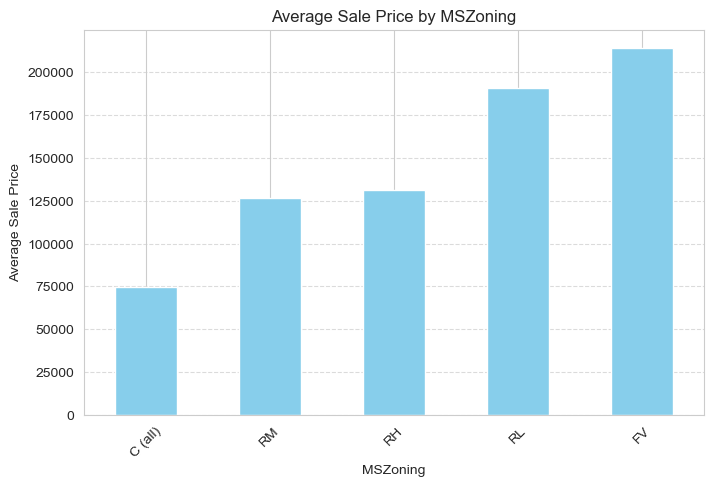

In [163]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_MSZoning_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('MSZoning')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by MSZoning')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [503]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order based on SalePrice
zoning_order = ["C (all)", "RM", "RH", "RL", "FV"]

encoder = OrdinalEncoder(categories=[zoning_order])
df["MSZoning"] = encoder.fit_transform(df[["MSZoning"]])

print(df[["MSZoning"]].head())

   MSZoning
0       3.0
1       3.0
2       3.0
3       3.0
4       3.0


### Street

In [169]:
mean_Street_SalePrice = df.groupby('Street')['SalePrice'].mean().sort_values(ascending=True)
print(mean_Street_SalePrice)

Street
Grvl    130190.500000
Pave    180877.224138
Name: SalePrice, dtype: float64


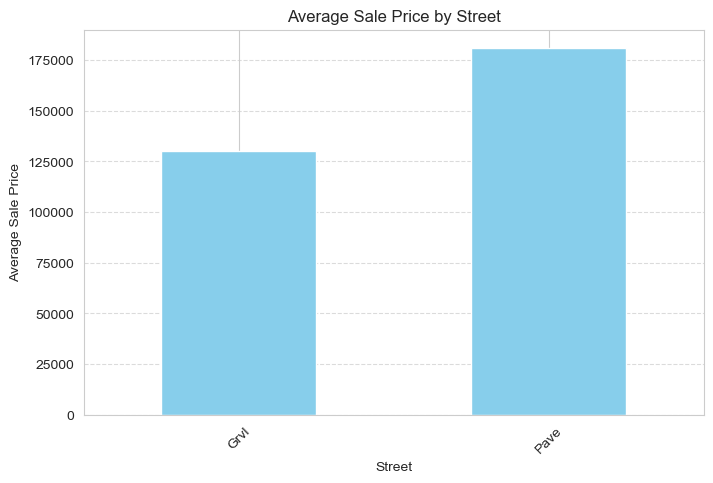

In [435]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Street_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Street')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Street')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [507]:
# Define the order based on SalePrice
street_order = ["Grvl", "Pave"]

encoder = OrdinalEncoder(categories=[street_order])
df['Street'] = encoder.fit_transform(df[['Street']])

print(df[["Street"]].head())

   Street
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0


### Alley

In [175]:
mean_Alley_SalePrice = df.groupby('Alley')['SalePrice'].mean()
print(mean_Alley_SalePrice)

Alley
Grvl    122219.080000
None    183189.846154
Pave    168000.585366
Name: SalePrice, dtype: float64


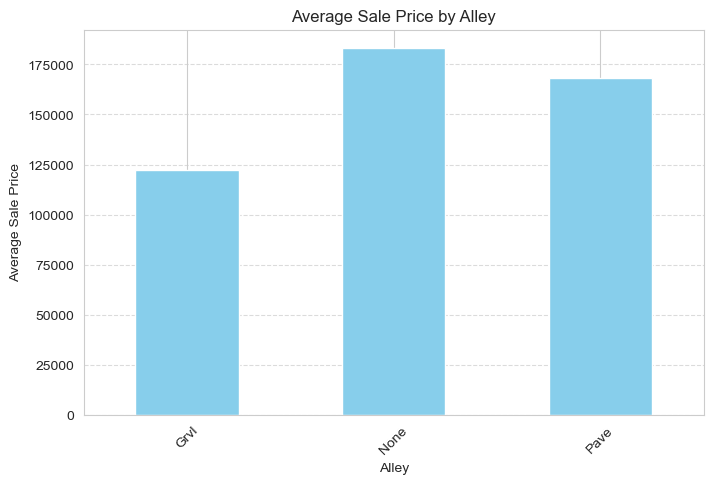

In [437]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Alley_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Alley')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Alley')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [511]:
# Define the order based on SalePrice
Alley_order = ["Grvl", "Pave", 'None']

encoder = OrdinalEncoder(categories=[Alley_order])
df['Alley'] = encoder.fit_transform(df[['Alley']])

print(df[["Alley"]].head())

   Alley
0    2.0
1    2.0
2    2.0
3    2.0
4    2.0


### LotShape

In [179]:
mean_LotShape_SalePrice = df.groupby('LotShape')['SalePrice'].mean().sort_values(ascending=True)
print(mean_LotShape_SalePrice)

LotShape
Reg    164414.727766
IR1    205940.385093
IR3    216036.500000
IR2    239833.365854
Name: SalePrice, dtype: float64


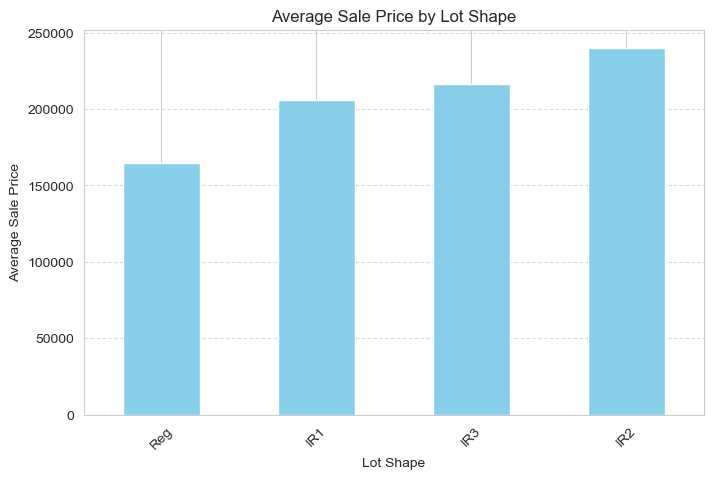

In [445]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_LotShape_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Lot Shape')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Lot Shape')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [514]:
# Define the order based on SalePrice
LotShape_order = ["Reg", "IR1", 'IR3', 'IR2']

encoder = OrdinalEncoder(categories=[LotShape_order])
df['LotShape'] = encoder.fit_transform(df[['LotShape']])

print(df[["LotShape"]].head())

   LotShape
0       0.0
1       0.0
2       1.0
3       1.0
4       1.0


### LandContour

In [185]:
mean_LandContour_SalePrice = df.groupby('LandContour')['SalePrice'].mean().sort_values(ascending=True)
print(mean_LandContour_SalePrice)

LandContour
Bnk    143104.079365
Lvl    180061.975535
Low    203661.111111
HLS    228259.122449
Name: SalePrice, dtype: float64


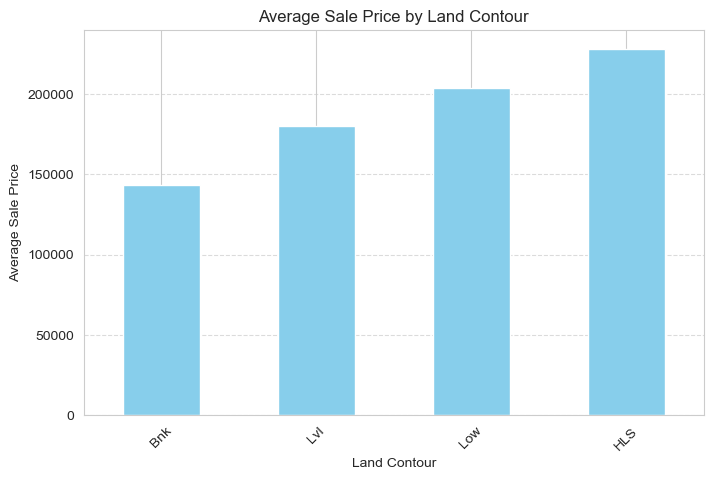

In [443]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_LandContour_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Land Contour')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Land Contour')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [517]:
# Define the order based on SalePrice
LandContour_order = ["Bnk", "Lvl", 'Low', 'HLS']

encoder = OrdinalEncoder(categories=[LandContour_order])
df['LandContour'] = encoder.fit_transform(df[['LandContour']])

print(df[["LandContour"]].head())

   LandContour
0          1.0
1          1.0
2          1.0
3          1.0
4          1.0


### Utilities

In [191]:
mean_Utilities_SalePrice = df.groupby('Utilities')['SalePrice'].mean().sort_values(ascending=True)
print(mean_Utilities_SalePrice)

Utilities
NoSeWa    137500.000000
AllPub    180698.019244
Name: SalePrice, dtype: float64


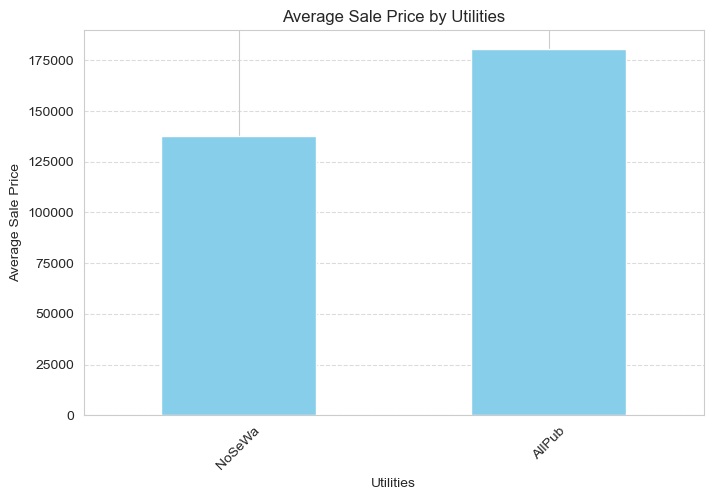

In [447]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Utilities_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Utilities')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Utilities')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [520]:
# Define the order based on SalePrice
Utilities_order = ["NoSeWa", "AllPub"]

encoder = OrdinalEncoder(categories=[Utilities_order])
df['Utilities'] = encoder.fit_transform(df[['Utilities']])

print(df[["Utilities"]].head())

   Utilities
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0


### LotConfig 

In [199]:
mean_LotConfig_SalePrice = df.groupby('LotConfig')['SalePrice'].mean().sort_values(ascending=True)
print(mean_LotConfig_SalePrice)

LotConfig
Inside     176571.562977
FR2        177934.574468
Corner     181623.425856
FR3        208475.000000
CulDSac    223854.617021
Name: SalePrice, dtype: float64


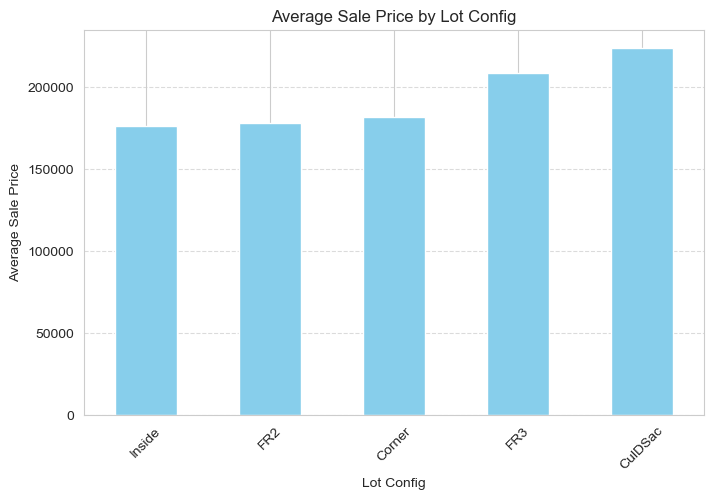

In [451]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_LotConfig_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Lot Config')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Lot Config')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [523]:
# Define the order based on SalePrice
LotConfig_order = ["Inside", "FR2", 'Corner', 'FR3', 'CulDSac']

encoder = OrdinalEncoder(categories=[LotConfig_order])
df['LotConfig'] = encoder.fit_transform(df[['LotConfig']])

print(df[["LotConfig"]].head())

   LotConfig
0        0.0
1        1.0
2        0.0
3        2.0
4        1.0


### LandSlope

In [205]:
mean_LandSlope_SalePrice = df.groupby('LandSlope')['SalePrice'].mean().sort_values(ascending=True)
print(mean_LandSlope_SalePrice)

LandSlope
Gtl    179686.842525
Mod    196734.138462
Sev    204379.230769
Name: SalePrice, dtype: float64


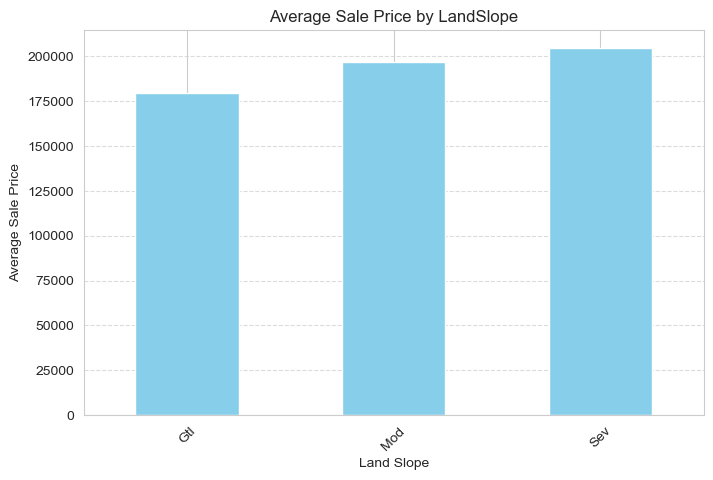

In [453]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_LandSlope_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Land Slope')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by LandSlope')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [526]:
# Define the order based on SalePrice
LandSlope_order = ["Gtl", "Mod", 'Sev']

encoder = OrdinalEncoder(categories=[LandSlope_order])
df['LandSlope'] = encoder.fit_transform(df[['LandSlope']])

print(df[["LandSlope"]].head())

   LandSlope
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0


### Neighborhood

In [211]:
mean_Neighborhood_SalePrice = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=True)
print(mean_Neighborhood_SalePrice)

Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
OldTown    128225.300885
Sawyer     136793.135135
Blueste    137500.000000
SWISU      142591.360000
NPkVill    142694.444444
NAmes      145847.080000
Mitchel    156270.122449
SawyerW    186555.796610
NWAmes     189050.068493
Gilbert    192854.506329
Blmngtn    194870.882353
CollgCr    197965.773333
Crawfor    210624.725490
ClearCr    212565.428571
Somerst    225109.858824
Veenker    238772.727273
Timber     244267.648649
StoneBr    307103.125000
NridgHt    316695.236842
NoRidge    335295.317073
Name: SalePrice, dtype: float64


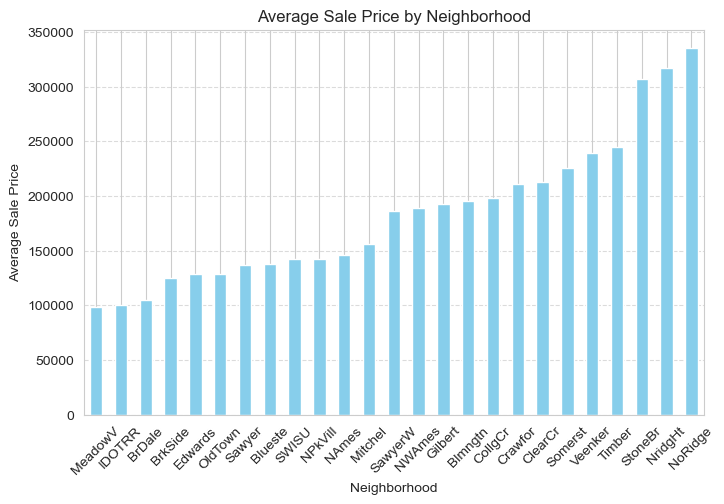

In [455]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Neighborhood_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Neighborhood')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [529]:
# Extract sorted neighborhood names
sorted_neighborhood = mean_Neighborhood_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_neighborhood)

# Print in the required format
print(f"['{formatted}']")

['MeadowV', 'IDOTRR', 'BrDale', 'BrkSide', 'Edwards', 'OldTown', 'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel', 'SawyerW', 'NWAmes', 'Gilbert', 'Blmngtn', 'CollgCr', 'Crawfor', 'ClearCr', 'Somerst', 'Veenker', 'Timber', 'StoneBr', 'NridgHt', 'NoRidge']


In [530]:
# Define the order based on SalePrice
Neighborhood_order = ['MeadowV', 'IDOTRR', 'BrDale', 'BrkSide', 'Edwards', 'OldTown', 'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel', 'SawyerW', 'NWAmes', 
                   'Gilbert', 'Blmngtn', 'CollgCr', 'Crawfor', 'ClearCr', 'Somerst', 'Veenker', 'Timber', 'StoneBr', 'NridgHt', 'NoRidge']

encoder = OrdinalEncoder(categories=[Neighborhood_order])
df['Neighborhood'] = encoder.fit_transform(df[['Neighborhood']])

print(df[["Neighborhood"]].head())

   Neighborhood
0          16.0
1          20.0
2          16.0
3          17.0
4          24.0


### House Conditions

In [229]:
#Combined conditions

In [231]:
df['Condition_Combined'] = df['Condition1'] + "_" + df['Condition2']

In [233]:
df['Condition_Combined'].unique()

array(['Norm_Norm', 'Feedr_Norm', 'PosN_Norm', 'Artery_Norm',
       'Artery_Artery', 'RRAe_Norm', 'Feedr_RRNn', 'RRNn_Norm',
       'RRAn_Feedr', 'PosA_Norm', 'Feedr_Feedr', 'RRAn_Norm', 'RRNe_Norm',
       'PosN_PosN', 'RRNn_Feedr', 'Artery_PosA', 'Feedr_RRAn',
       'Feedr_RRAe'], dtype=object)

In [243]:
mean_Condition_Combined_SalePrice = df.groupby('Condition_Combined')['SalePrice'].mean().sort_values(ascending=True)
print(mean_Condition_Combined_SalePrice)

Condition_Combined
Feedr_Feedr       85000.000000
Feedr_RRNn        96750.000000
Artery_Artery    106500.000000
RRNn_Feedr       128000.000000
RRAn_Feedr       128500.000000
Artery_Norm      132142.222222
Feedr_RRAn       136905.000000
RRAe_Norm        138400.000000
Feedr_Norm       143883.013158
Norm_Norm        184213.767516
Feedr_RRAe       190000.000000
RRNe_Norm        190750.000000
RRAn_Norm        194559.636364
PosN_Norm        206985.294118
PosA_Norm        225875.000000
RRNn_Norm        233500.000000
PosN_PosN        284875.000000
Artery_PosA      325000.000000
Name: SalePrice, dtype: float64


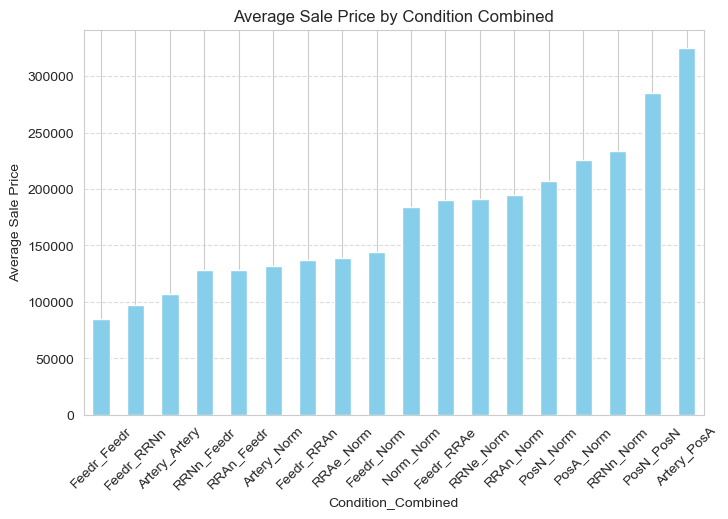

In [457]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Condition_Combined_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Condition_Combined')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Condition Combined')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [247]:
# Extract sorted condition combined names
sorted_Condition_Combined = mean_Condition_Combined_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_Condition_Combined)

# Print in the required format
print(f"['{formatted}']")

['Feedr_Feedr', 'Feedr_RRNn', 'Artery_Artery', 'RRNn_Feedr', 'RRAn_Feedr', 'Artery_Norm', 'Feedr_RRAn', 'RRAe_Norm', 'Feedr_Norm', 'Norm_Norm', 'Feedr_RRAe', 'RRNe_Norm', 'RRAn_Norm', 'PosN_Norm', 'PosA_Norm', 'RRNn_Norm', 'PosN_PosN', 'Artery_PosA']


In [537]:
# Define the order based on SalePrice
Condition_Combined = ['Feedr_Feedr', 'Feedr_RRNn', 'Artery_Artery', 'RRNn_Feedr', 'RRAn_Feedr', 'Artery_Norm', 'Feedr_RRAn', 'RRAe_Norm', 'Feedr_Norm', 'Norm_Norm', 'Feedr_RRAe', 'RRNe_Norm', 
'RRAn_Norm', 'PosN_Norm', 'PosA_Norm', 'RRNn_Norm', 'PosN_PosN', 'Artery_PosA']

encoder = OrdinalEncoder(categories=[Condition_Combined])
df['Condition_Combined'] = encoder.fit_transform(df[['Condition_Combined']])

print(df[["Condition_Combined"]].head())

   Condition_Combined
0                 9.0
1                 8.0
2                 9.0
3                 9.0
4                 9.0


In [538]:
#separated conditions

In [255]:
#condition 1
mean_Condition1_SalePrice = df.groupby('Condition1')['SalePrice'].mean().sort_values(ascending=True)
print(mean_Condition1_SalePrice)

Condition1
Artery    135091.666667
RRAe      138400.000000
Feedr     142475.481481
Norm      184213.767516
RRAn      184396.615385
RRNe      190750.000000
RRNn      212400.000000
PosN      215184.210526
PosA      225875.000000
Name: SalePrice, dtype: float64


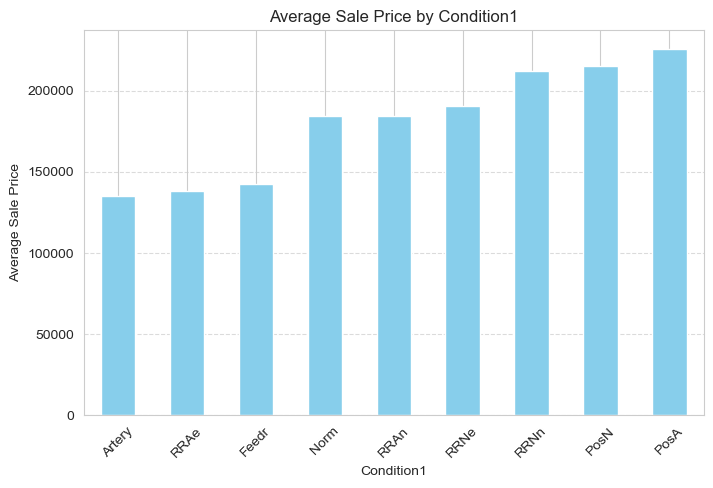

In [459]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Condition1_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Condition1')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Condition1')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [261]:
# Extract sorted condition 1
sorted_Condition1 = mean_Condition1_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_Condition1)

# Print in the required format
print(f"['{formatted}']")

['Artery', 'RRAe', 'Feedr', 'Norm', 'RRAn', 'RRNe', 'RRNn', 'PosN', 'PosA']


In [541]:
# Define the order based on SalePrice
Condition1_order = ['Artery', 'RRAe', 'Feedr', 'Norm', 'RRAn', 'RRNe', 'RRNn', 'PosN', 'PosA']

encoder = OrdinalEncoder(categories=[Condition1_order])
df['Condition1'] = encoder.fit_transform(df[['Condition1']])

print(df[["Condition1"]].head())

   Condition1
0         3.0
1         2.0
2         3.0
3         3.0
4         3.0


In [265]:
#condition 2
mean_Condition2_SalePrice = df.groupby('Condition2')['SalePrice'].mean().sort_values(ascending=True)
print(mean_Condition2_SalePrice)

Condition2
RRNn       96750.000000
Artery    106500.000000
Feedr     121166.666667
RRAn      136905.000000
Norm      180914.616933
RRAe      190000.000000
PosN      284875.000000
PosA      325000.000000
Name: SalePrice, dtype: float64


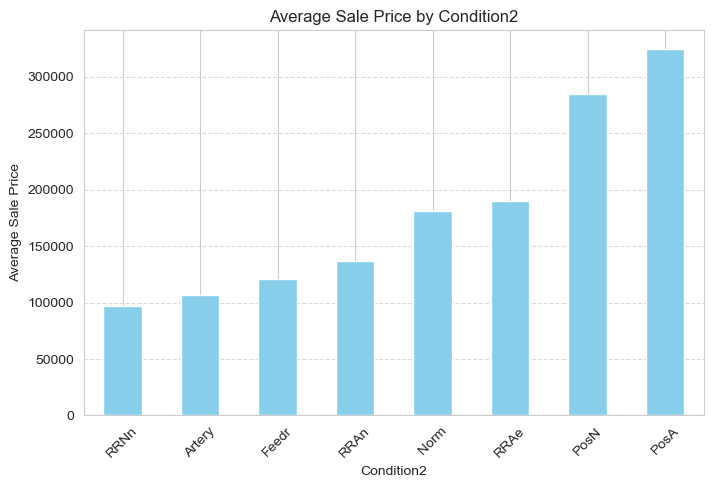

In [461]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Condition2_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Condition2')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Condition2')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [267]:
# Extract sorted condition 2 names
sorted_Condition2 = mean_Condition2_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_Condition2)

# Print in the required format
print(f"['{formatted}']")

['RRNn', 'Artery', 'Feedr', 'RRAn', 'Norm', 'RRAe', 'PosN', 'PosA']


In [544]:
# Define the order based on SalePrice
Condition2_order = ['RRNn', 'Artery', 'Feedr', 'RRAn', 'Norm', 'RRAe', 'PosN', 'PosA']

encoder = OrdinalEncoder(categories=[Condition2_order])
df['Condition2'] = encoder.fit_transform(df[['Condition2']])

print(df[["Condition2"]].head())

   Condition2
0         4.0
1         4.0
2         4.0
3         4.0
4         4.0


### Building Type

In [464]:
#condition 2
mean_BldgType_SalePrice = df.groupby('BldgType')['SalePrice'].mean().sort_values(ascending=True)
print(mean_BldgType_SalePrice)

BldgType
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
1Fam      185476.987664
Name: SalePrice, dtype: float64


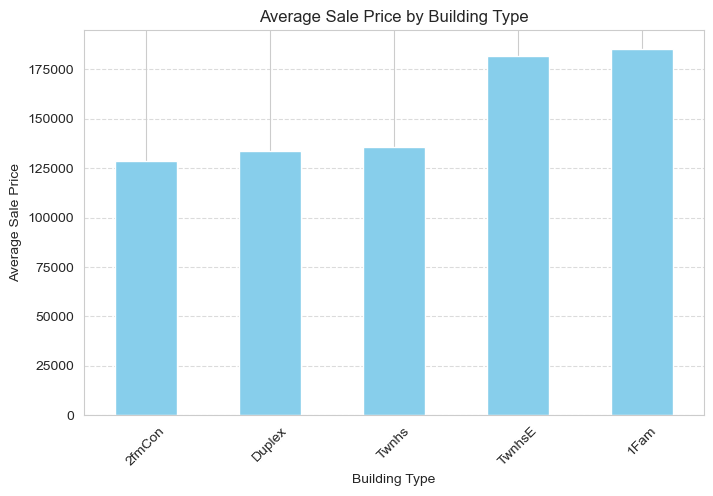

In [468]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_BldgType_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Building Type')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Building Type')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [547]:
# Extract sorted neighborhood names
sorted_BldgType = mean_BldgType_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_BldgType)

# Print in the required format
print(f"['{formatted}']")

['2fmCon', 'Duplex', 'Twnhs', 'TwnhsE', '1Fam']


In [548]:
# Define the order based on SalePrice
BldgType_order = ['2fmCon', 'Duplex', 'Twnhs', 'TwnhsE', '1Fam']

encoder = OrdinalEncoder(categories=[BldgType_order])
df['BldgType'] = encoder.fit_transform(df[['BldgType']])

print(df[["BldgType"]].head())

   BldgType
0       4.0
1       4.0
2       4.0
3       4.0
4       4.0


### HouseStyle

In [277]:
mean_HouseStyle_SalePrice = df.groupby('HouseStyle')['SalePrice'].mean().sort_values(ascending=True)
print(mean_HouseStyle_SalePrice)

HouseStyle
1.5Unf    110150.000000
SFoyer    135074.486486
1.5Fin    143116.740260
2.5Unf    157354.545455
SLvl      166690.937500
1Story    175437.246196
2Story    210051.764045
2.5Fin    220000.000000
Name: SalePrice, dtype: float64


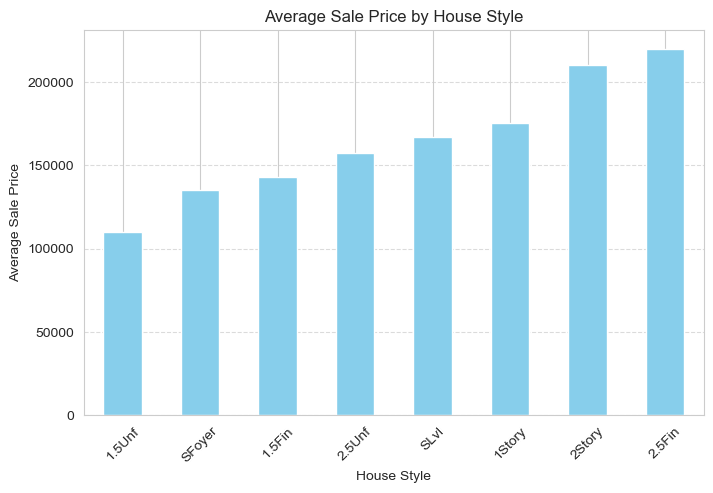

In [477]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_HouseStyle_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('House Style')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by House Style')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [551]:
# Extract sorted neighborhood names
sorted_HouseStyle = mean_HouseStyle_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_HouseStyle)

# Print in the required format
print(f"['{formatted}']")

['1.5Unf', 'SFoyer', '1.5Fin', '2.5Unf', 'SLvl', '1Story', '2Story', '2.5Fin']


In [552]:
# Define the order based on SalePrice
HouseStyle_order = ['1.5Unf', 'SFoyer', '1.5Fin', '2.5Unf', 'SLvl', '1Story', '2Story', '2.5Fin']

encoder = OrdinalEncoder(categories=[HouseStyle_order])
df['HouseStyle'] = encoder.fit_transform(df[['HouseStyle']])

print(df[["HouseStyle"]].head())

   HouseStyle
0         6.0
1         5.0
2         6.0
3         6.0
4         6.0


### RoofStyle

In [281]:
mean_RoofStyle_SalePrice = df.groupby('RoofStyle')['SalePrice'].mean().sort_values(ascending=True)
print(mean_RoofStyle_SalePrice)

RoofStyle
Gambrel    148909.090909
Gable      171194.810193
Mansard    180568.428571
Flat       194690.000000
Hip        218773.596491
Shed       225000.000000
Name: SalePrice, dtype: float64


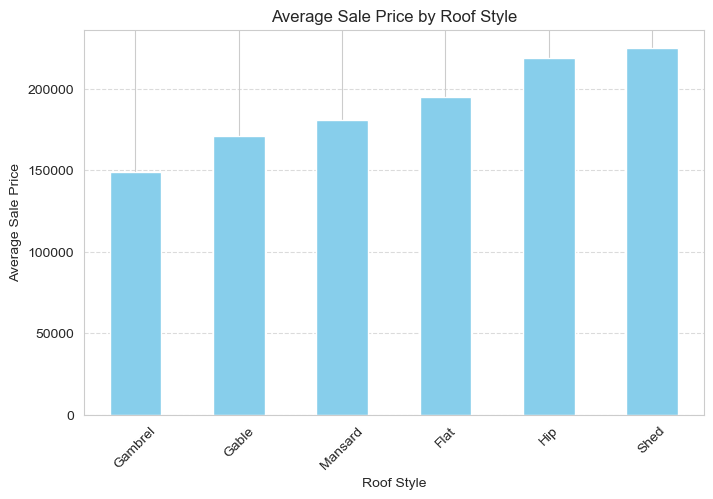

In [495]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_RoofStyle_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Roof Style')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Roof Style')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [555]:
# Extract sorted neighborhood names
sorted_RoofStyle = mean_RoofStyle_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_RoofStyle)

# Print in the required format
print(f"['{formatted}']")

['Gambrel', 'Gable', 'Mansard', 'Flat', 'Hip', 'Shed']


In [556]:
# Define the order based on SalePrice
RoofStyle_order = ['Gambrel', 'Gable', 'Mansard', 'Flat', 'Hip', 'Shed']

encoder = OrdinalEncoder(categories=[RoofStyle_order])
df['RoofStyle'] = encoder.fit_transform(df[['RoofStyle']])

print(df[["RoofStyle"]].head())

   RoofStyle
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0


### Roof Material

In [285]:
mean_RoofMatl_SalePrice = df.groupby('RoofMatl')['SalePrice'].mean().sort_values(ascending=True)
print(mean_RoofStyle_SalePrice)

RoofStyle
Gambrel    148909.090909
Gable      171194.810193
Mansard    180568.428571
Flat       194690.000000
Hip        218773.596491
Shed       225000.000000
Name: SalePrice, dtype: float64


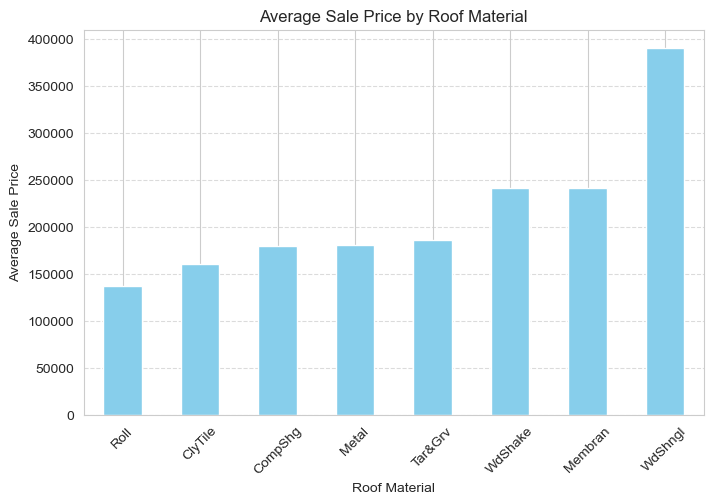

In [474]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_RoofMatl_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Roof Material')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Roof Material')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [491]:
# Extract sorted RoofMatl names
sorted_RoofMatl = mean_RoofMatl_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_RoofMatl)

# Print in the required format
print(f"['{formatted}']")

['Roll', 'ClyTile', 'CompShg', 'Metal', 'Tar&Grv', 'WdShake', 'Membran', 'WdShngl']


In [560]:
# Define the order based on SalePrice
RoofMatl_order = ['Roll', 'ClyTile', 'CompShg', 'Metal', 'Tar&Grv', 'WdShake', 'Membran', 'WdShngl']

encoder = OrdinalEncoder(categories=[RoofMatl_order])
df['RoofMatl'] = encoder.fit_transform(df[['RoofMatl']])

print(df[["RoofMatl"]].head())

   RoofMatl
0       2.0
1       2.0
2       2.0
3       2.0
4       2.0


### Exteriors

In [289]:
#exterios 1
mean_Exterior1st_SalePrice = df.groupby('Exterior1st')['SalePrice'].mean().sort_values(ascending=True)
print(mean_Exterior1st_SalePrice)

Exterior1st
BrkComm     71000.000000
AsphShn    100000.000000
CBlock     105000.000000
AsbShng    107385.550000
MetalSd    148314.515982
Wd Sdng    149841.645631
WdShing    150655.076923
Stucco     162990.000000
HdBoard    163077.450450
Plywood    175942.379630
BrkFace    194573.000000
VinylSd    213618.390625
CemntBd    231690.655738
Stone      258500.000000
ImStucc    262000.000000
Name: SalePrice, dtype: float64


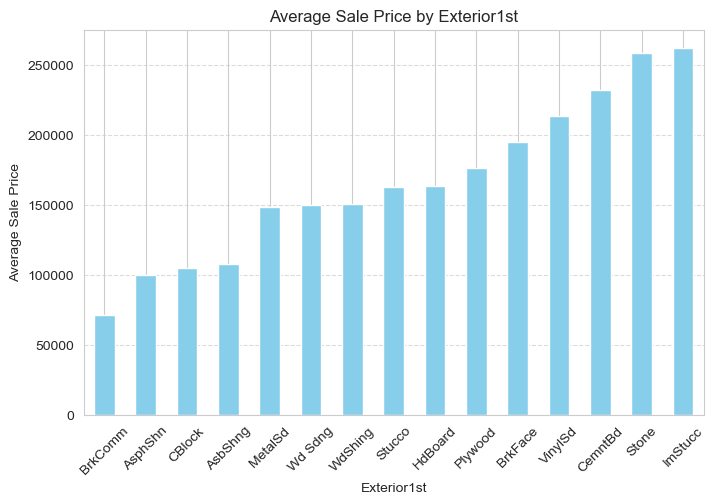

In [479]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Exterior1st_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Exterior1st')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Exterior1st')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [489]:
# Extract sorted Exterior1st names
sorted_Exterior1st = mean_Exterior1st_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_Exterior1st)

# Print in the required format
print(f"['{formatted}']")

['BrkComm', 'AsphShn', 'CBlock', 'AsbShng', 'MetalSd', 'Wd Sdng', 'WdShing', 'Stucco', 'HdBoard', 'Plywood', 'BrkFace', 'VinylSd', 'CemntBd', 'Stone', 'ImStucc']


In [564]:
# Define the order based on SalePrice
Exterior1st_order = ['BrkComm', 'AsphShn', 'CBlock', 'AsbShng', 'MetalSd', 'Wd Sdng', 'WdShing', 'Stucco', 'HdBoard', 'Plywood', 'BrkFace', 'VinylSd', 'CemntBd', 'Stone', 'ImStucc']

encoder = OrdinalEncoder(categories=[Exterior1st_order])
df['Exterior1st'] = encoder.fit_transform(df[['Exterior1st']])

print(df[["Exterior1st"]].head())

   Exterior1st
0         11.0
1          4.0
2         11.0
3          5.0
4         11.0


In [483]:
#exterios 2
mean_Exterior2nd_SalePrice = df.groupby('Exterior2nd')['SalePrice'].mean().sort_values(ascending=True)
print(mean_Exterior2nd_SalePrice)

Exterior2nd
CBlock     105000.000000
AsbShng    114060.550000
Brk Cmn    126714.285714
AsphShn    138000.000000
Wd Sdng    148386.065990
MetalSd    148666.098592
Stucco     155905.153846
Stone      158224.800000
Wd Shng    161328.947368
HdBoard    167661.565217
Plywood    168112.387324
BrkFace    195818.000000
VinylSd    214319.624750
CmentBd    230093.833333
ImStucc    252070.000000
Other      319000.000000
Name: SalePrice, dtype: float64


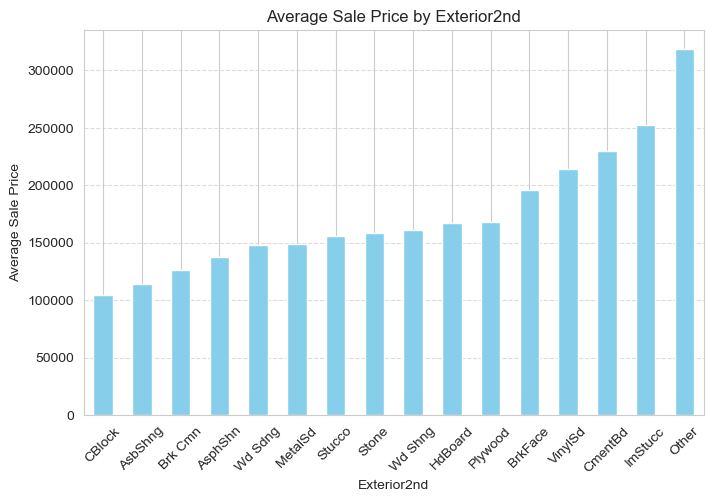

In [485]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Exterior2nd_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Exterior2nd')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Exterior2nd')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [487]:
# Extract sorted Exterior2nd names
sorted_Exterior2nd = mean_Exterior2nd_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_Exterior2nd)

# Print in the required format
print(f"['{formatted}']")

['CBlock', 'AsbShng', 'Brk Cmn', 'AsphShn', 'Wd Sdng', 'MetalSd', 'Stucco', 'Stone', 'Wd Shng', 'HdBoard', 'Plywood', 'BrkFace', 'VinylSd', 'CmentBd', 'ImStucc', 'Other']


In [567]:
# Define the order based on SalePrice
Exterior2nd_order = ['CBlock', 'AsbShng', 'Brk Cmn', 'AsphShn', 'Wd Sdng', 'MetalSd', 'Stucco', 'Stone', 'Wd Shng', 'HdBoard', 'Plywood', 'BrkFace', 'VinylSd', 'CmentBd', 'ImStucc', 'Other']

encoder = OrdinalEncoder(categories=[Exterior2nd_order])
df['Exterior2nd'] = encoder.fit_transform(df[['Exterior2nd']])

print(df[["Exterior2nd"]].head())

   Exterior2nd
0         12.0
1          5.0
2         12.0
3          8.0
4         12.0


### Masonry veneer type

In [293]:
mean_MasVnrType_SalePrice = df.groupby('MasVnrType')['SalePrice'].mean().sort_values(ascending=True)
print(mean_MasVnrType_SalePrice)

MasVnrType
BrkCmn     146318.066667
None       156946.140069
BrkFace    204090.029345
Stone      265719.496063
Name: SalePrice, dtype: float64


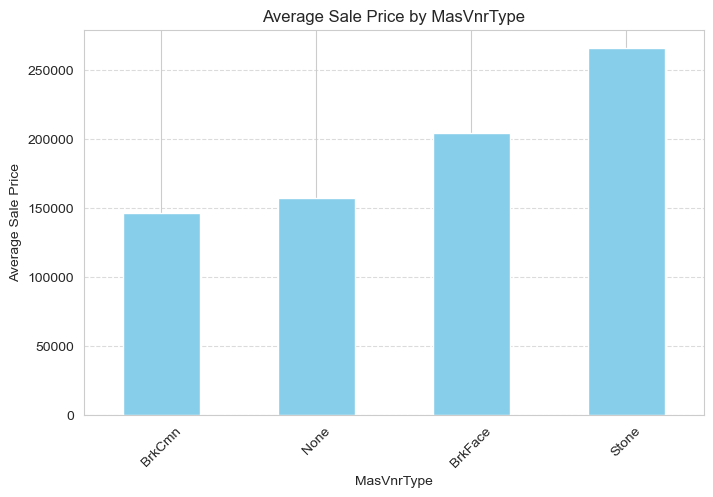

In [295]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_MasVnrType_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('MasVnrType')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by MasVnrType')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [570]:
# Extract sorted neighborhood names
sorted_MasVnrType = mean_MasVnrType_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_MasVnrType)

# Print in the required format
print(f"['{formatted}']")

['BrkCmn', 'None', 'BrkFace', 'Stone']


In [571]:
# Define the order based on SalePrice
MasVnrType_order = ['BrkCmn', 'None', 'BrkFace', 'Stone']

encoder = OrdinalEncoder(categories=[MasVnrType_order])
df['MasVnrType'] = encoder.fit_transform(df[['MasVnrType']])

print(df[["MasVnrType"]].head())

   MasVnrType
0         2.0
1         1.0
2         2.0
3         1.0
4         2.0


### Exterior Quality

In [297]:
mean_ExterQual_SalePrice = df.groupby('ExterQual')['SalePrice'].mean().sort_values(ascending=True)
print(mean_ExterQual_SalePrice)

ExterQual
Fa     87985.214286
TA    144315.723757
Gd    231160.463918
Ex    367360.961538
Name: SalePrice, dtype: float64


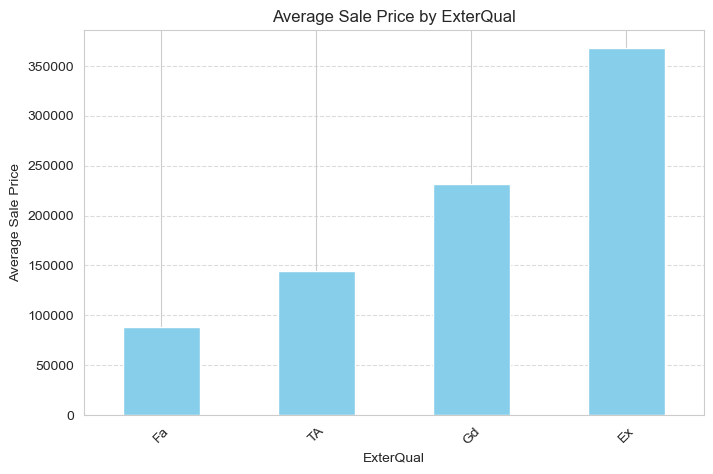

In [299]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_ExterQual_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('ExterQual')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by ExterQual')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [574]:
# Extract sorted neighborhood names
sorted_ExterQual= mean_ExterQual_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_ExterQual)

# Print in the required format
print(f"['{formatted}']")

['Fa', 'TA', 'Gd', 'Ex']


In [575]:
# Define the order based on SalePrice
ExterQual_order = ['Fa', 'TA', 'Gd', 'Ex']

encoder = OrdinalEncoder(categories=[ExterQual_order])
df['ExterQual'] = encoder.fit_transform(df[['ExterQual']])

print(df[["ExterQual"]].head())

   ExterQual
0        2.0
1        1.0
2        2.0
3        1.0
4        2.0


### Ekstenal Condition

In [301]:
mean_ExterCond_SalePrice = df.groupby('ExterCond')['SalePrice'].mean().sort_values(ascending=True)
print(mean_ExterCond_SalePrice)

ExterCond
Po     76500.000000
Fa    102595.142857
Gd    168897.568493
TA    183756.579812
Ex    201333.333333
Name: SalePrice, dtype: float64


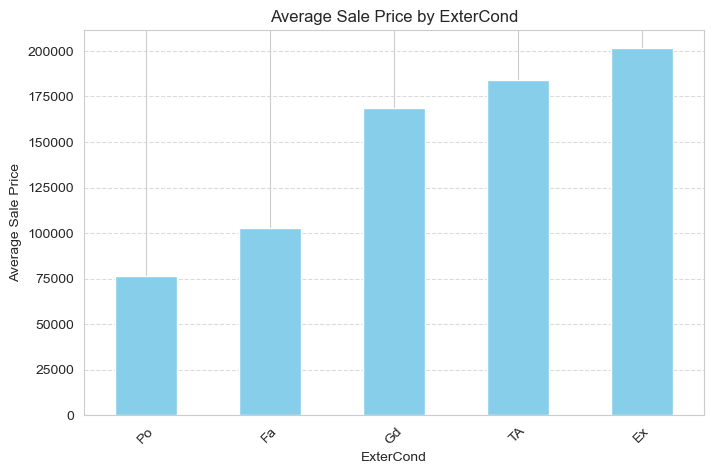

In [303]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_ExterCond_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('ExterCond')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by ExterCond')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [578]:
# Extract sorted neighborhood names
sorted_ExterCond= mean_ExterCond_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_ExterCond)

# Print in the required format
print(f"['{formatted}']")

['Po', 'Fa', 'Gd', 'TA', 'Ex']


In [579]:
# Define the order based on SalePrice
ExterCond_order = ['Po', 'Fa', 'Gd', 'TA', 'Ex']

encoder = OrdinalEncoder(categories=[ExterCond_order])
df['ExterCond'] = encoder.fit_transform(df[['ExterCond']])

print(df[["ExterCond"]].head())

   ExterCond
0        3.0
1        3.0
2        3.0
3        3.0
4        3.0


### Foundation

In [305]:
mean_Foundation_SalePrice = df.groupby('Foundation')['SalePrice'].mean().sort_values(ascending=True)
print(mean_Foundation_SalePrice)

Foundation
Slab      107365.625000
BrkTil    132291.075342
CBlock    149805.714511
Stone     165959.166667
Wood      185666.666667
PConc     224933.542768
Name: SalePrice, dtype: float64


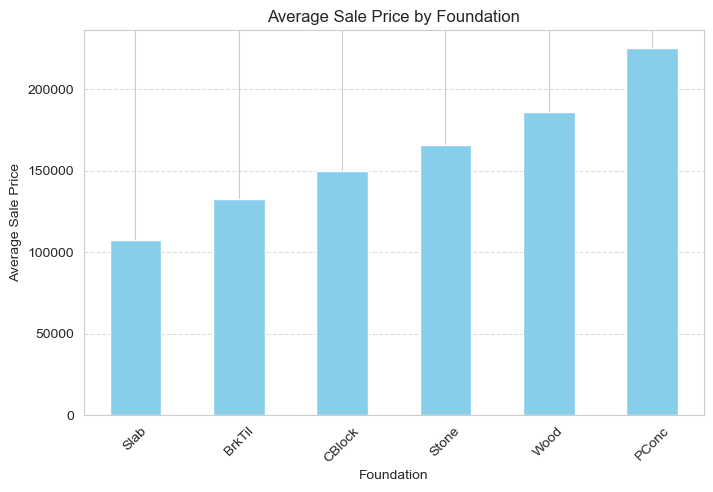

In [307]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Foundation_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Foundation')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Foundation')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [582]:
# Extract sorted neighborhood names
sorted_Foundation= mean_Foundation_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_Foundation)

# Print in the required format
print(f"['{formatted}']")

['Slab', 'BrkTil', 'CBlock', 'Stone', 'Wood', 'PConc']


In [583]:
# Define the order based on SalePrice
Foundation_order = ['Slab', 'BrkTil', 'CBlock', 'Stone', 'Wood', 'PConc']

encoder = OrdinalEncoder(categories=[Foundation_order])
df['Foundation'] = encoder.fit_transform(df[['Foundation']])

print(df[["Foundation"]].head())

   Foundation
0         5.0
1         2.0
2         5.0
3         1.0
4         5.0


### Basement Quality

In [311]:
mean_BsmtQual_SalePrice = df.groupby('BsmtQual')['SalePrice'].mean().sort_values(ascending=True)
print(mean_BsmtQual_SalePrice)

BsmtQual
None    105652.891892
Fa      115692.028571
TA      140759.818182
Gd      202230.703583
Ex      327041.041322
Name: SalePrice, dtype: float64


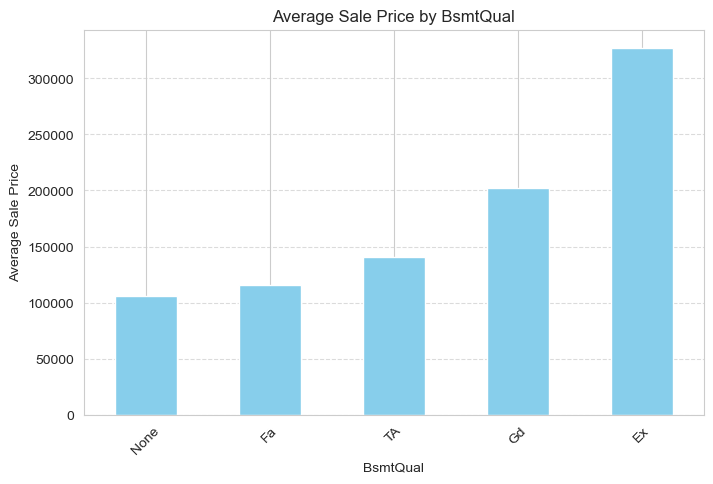

In [313]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_BsmtQual_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('BsmtQual')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by BsmtQual')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [586]:
# Extract sorted neighborhood names
sorted_BsmtQual= mean_BsmtQual_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_BsmtQual)

# Print in the required format
print(f"['{formatted}']")

['None', 'Fa', 'TA', 'Gd', 'Ex']


In [587]:
# Define the order based on SalePrice
BsmtQual_order = ['None', 'Fa', 'TA', 'Gd', 'Ex']

encoder = OrdinalEncoder(categories=[BsmtQual_order])
df['BsmtQual'] = encoder.fit_transform(df[['BsmtQual']])

print(df[["BsmtQual"]].head())

   BsmtQual
0       3.0
1       3.0
2       3.0
3       2.0
4       3.0


### Basement Condition

In [317]:
mean_BsmtCond_SalePrice = df.groupby('BsmtCond')['SalePrice'].mean().sort_values(ascending=True)
print(mean_BsmtQual_SalePrice)

BsmtQual
None    105652.891892
Fa      115692.028571
TA      140759.818182
Gd      202230.703583
Ex      327041.041322
Name: SalePrice, dtype: float64


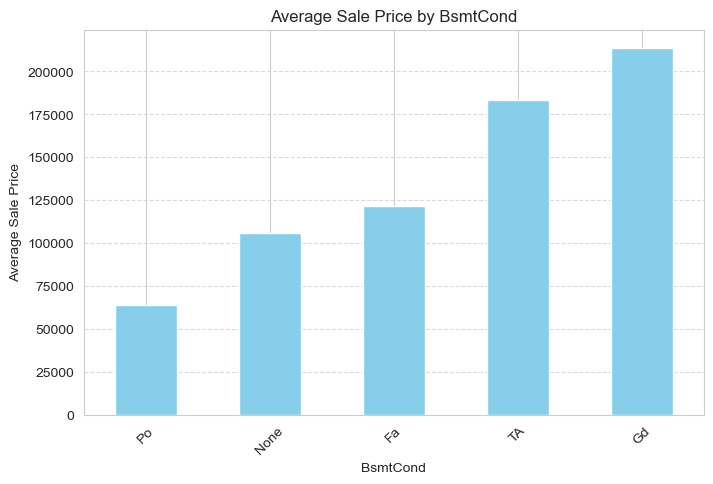

In [319]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_BsmtCond_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('BsmtCond')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by BsmtCond')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [590]:
# Extract sorted neighborhood names
sorted_BsmtCond= mean_BsmtCond_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_BsmtCond)

# Print in the required format
print(f"['{formatted}']")

['Po', 'None', 'Fa', 'TA', 'Gd']


In [591]:
# Define the order based on SalePrice
BsmtCond_order = ['Po', 'None', 'Fa', 'TA', 'Gd']

encoder = OrdinalEncoder(categories=[BsmtCond_order])
df['BsmtCond'] = encoder.fit_transform(df[['BsmtCond']])

print(df[["BsmtCond"]].head())

   BsmtCond
0       3.0
1       3.0
2       3.0
3       4.0
4       3.0


### Basement Exsposure

In [321]:
mean_BsmtExposure_SalePrice = df.groupby('BsmtExposure')['SalePrice'].mean().sort_values(ascending=True)
print(mean_BsmtExposure_SalePrice)

BsmtExposure
None    107938.342105
No      165525.907466
Mn      192789.657895
Av      205606.703196
Gd      257689.805970
Name: SalePrice, dtype: float64


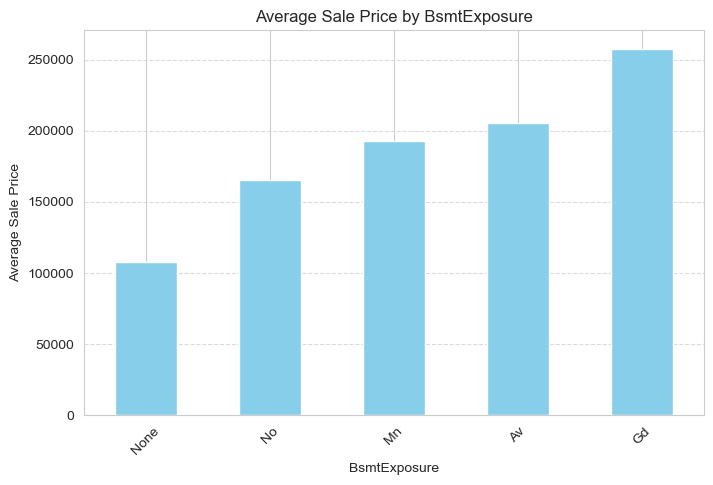

In [323]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_BsmtExposure_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('BsmtExposure')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by BsmtExposure')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [594]:
# Extract sorted neighborhood names
sorted_BsmtExposure= mean_BsmtExposure_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_BsmtExposure)

# Print in the required format
print(f"['{formatted}']")

['None', 'No', 'Mn', 'Av', 'Gd']


In [595]:
# Define the order based on SalePrice
BsmtExposure_order = ['None', 'No', 'Mn', 'Av', 'Gd']

encoder = OrdinalEncoder(categories=[BsmtExposure_order])
df['BsmtExposure'] = encoder.fit_transform(df[['BsmtExposure']])

print(df[["BsmtExposure"]].head())

   BsmtExposure
0           1.0
1           4.0
2           2.0
3           1.0
4           3.0


### Basement Finished Area

In [325]:
#Type 1
mean_BsmtFinType1_SalePrice = df.groupby('BsmtFinType1')['SalePrice'].mean().sort_values(ascending=True)
print(mean_BsmtFinType1_SalePrice)

BsmtFinType1
None    105652.891892
Rec     146889.248120
BLQ     149493.655405
LwQ     151852.702703
ALQ     161573.068182
Unf     170496.542056
GLQ     234920.516827
Name: SalePrice, dtype: float64


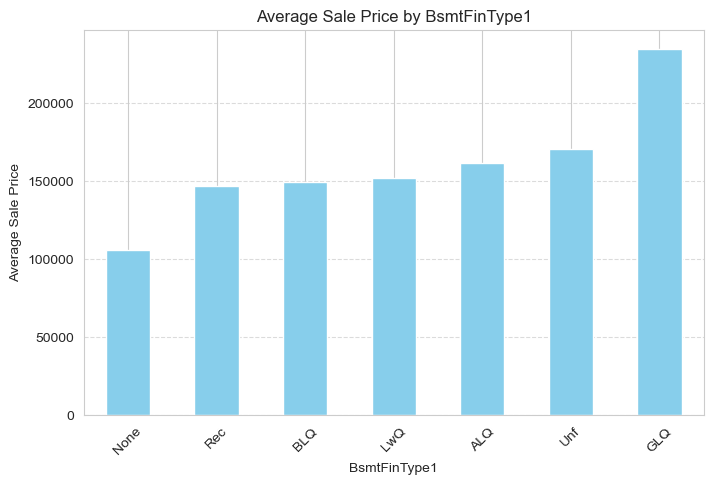

In [327]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_BsmtFinType1_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('BsmtFinType1')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by BsmtFinType1')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [598]:
# Extract sorted neighborhood names
sorted_BsmtFinType1= mean_BsmtFinType1_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_BsmtFinType1)

# Print in the required format
print(f"['{formatted}']")

['None', 'Rec', 'BLQ', 'LwQ', 'ALQ', 'Unf', 'GLQ']


In [599]:
# Define the order based on SalePrice
BsmtFinType1_order = ['None', 'Rec', 'BLQ', 'LwQ', 'ALQ', 'Unf', 'GLQ']

encoder = OrdinalEncoder(categories=[BsmtFinType1_order])
df['BsmtFinType1'] = encoder.fit_transform(df[['BsmtFinType1']])

print(df[["BsmtFinType1"]].head())

   BsmtFinType1
0           6.0
1           4.0
2           6.0
3           4.0
4           6.0


In [329]:
#Type 2
mean_BsmtFinType2_SalePrice = df.groupby('BsmtFinType2')['SalePrice'].mean().sort_values(ascending=True)
print(mean_BsmtFinType2_SalePrice)

BsmtFinType2
None    105652.891892
Rec     146889.248120
BLQ     149493.655405
LwQ     151852.702703
ALQ     161573.068182
Unf     170496.542056
GLQ     234920.516827
Name: SalePrice, dtype: float64


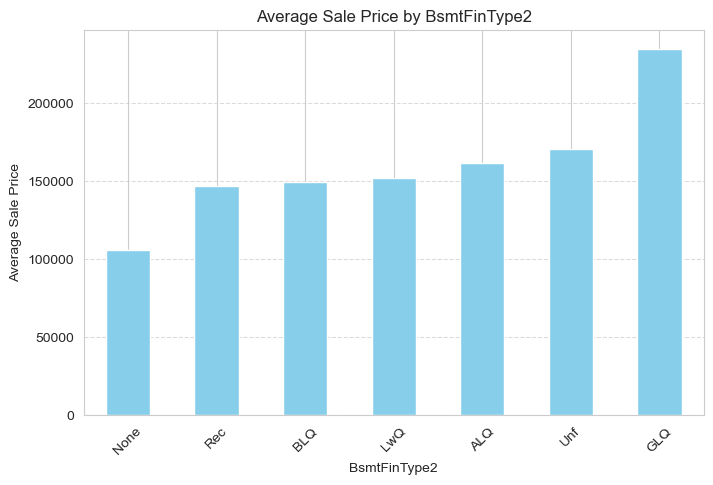

In [331]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_BsmtFinType2_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('BsmtFinType2')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by BsmtFinType2')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [601]:
# Extract sorted neighborhood names
sorted_BsmtFinType2= mean_BsmtFinType2_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_BsmtFinType2)

# Print in the required format
print(f"['{formatted}']")

['None', 'Rec', 'BLQ', 'LwQ', 'ALQ', 'Unf', 'GLQ']


In [602]:
# Define the order based on SalePrice
BsmtFinType1_order = ['None', 'Rec', 'BLQ', 'LwQ', 'ALQ', 'Unf', 'GLQ']

encoder = OrdinalEncoder(categories=[BsmtFinType1_order])
df['BsmtFinType2'] = encoder.fit_transform(df[['BsmtFinType2']])

print(df[["BsmtFinType2"]].head())

   BsmtFinType2
0           6.0
1           4.0
2           6.0
3           4.0
4           6.0


### Heating

In [333]:
mean_Heating_SalePrice = df.groupby('Heating')['SalePrice'].mean().sort_values(ascending=True)
print(mean_Heating_SalePrice)

Heating
Floor     72500.000000
Grav      75271.428571
Wall      92100.000000
OthW     125750.000000
GasW     166632.166667
GasA     181765.757725
Name: SalePrice, dtype: float64


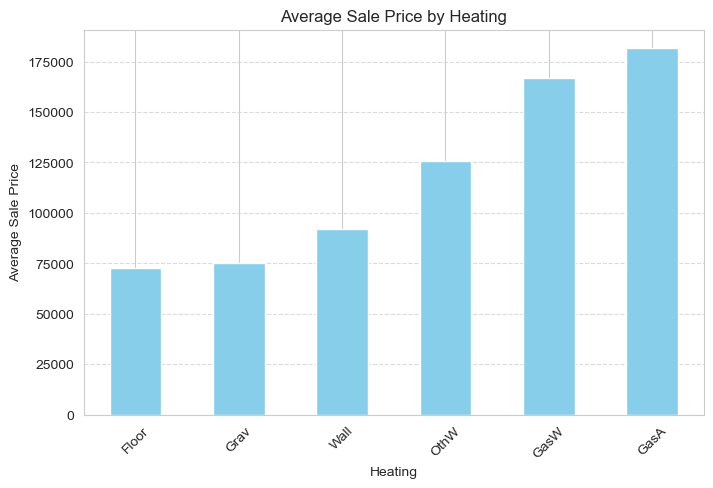

In [335]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Heating_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Heating')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Heating')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [605]:
# Extract sorted neighborhood names
sorted_Heating= mean_Heating_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_Heating)

# Print in the required format
print(f"['{formatted}']")

['Floor', 'Grav', 'Wall', 'OthW', 'GasW', 'GasA']


In [606]:
# Define the order based on SalePrice
Heating_order = ['Floor', 'Grav', 'Wall', 'OthW', 'GasW', 'GasA']

encoder = OrdinalEncoder(categories=[Heating_order])
df['Heating'] = encoder.fit_transform(df[['Heating']])

print(df[["Heating"]].head())

   Heating
0      5.0
1      5.0
2      5.0
3      5.0
4      5.0


### Heating Quality

In [337]:
mean_HeatingQC_SalePrice = df.groupby('HeatingQC')['SalePrice'].mean().sort_values(ascending=True)
print(mean_HeatingQC_SalePrice)

HeatingQC
Po     87000.000000
Fa    123919.489796
TA    142362.876168
Gd    156814.533333
Ex    214535.588076
Name: SalePrice, dtype: float64


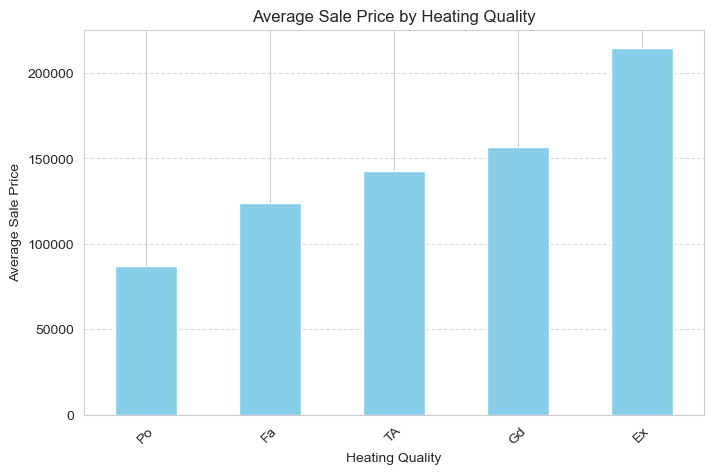

In [341]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_HeatingQC_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Heating Quality')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Heating Quality')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [609]:
# Extract sorted neighborhood names
sorted_HeatingQC= mean_HeatingQC_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_HeatingQC)

# Print in the required format
print(f"['{formatted}']")

['Po', 'Fa', 'TA', 'Gd', 'Ex']


In [610]:
# Define the order based on SalePrice
HeatingQC_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex']

encoder = OrdinalEncoder(categories=[HeatingQC_order])
df['HeatingQC'] = encoder.fit_transform(df[['HeatingQC']])

print(df[["HeatingQC"]].head())

   HeatingQC
0        4.0
1        4.0
2        4.0
3        3.0
4        4.0


### CentralAir

In [343]:
mean_CentralAir_SalePrice = df.groupby('CentralAir')['SalePrice'].mean().sort_values(ascending=True)
print(mean_CentralAir_SalePrice)

CentralAir
N    105264.073684
Y    185931.690669
Name: SalePrice, dtype: float64


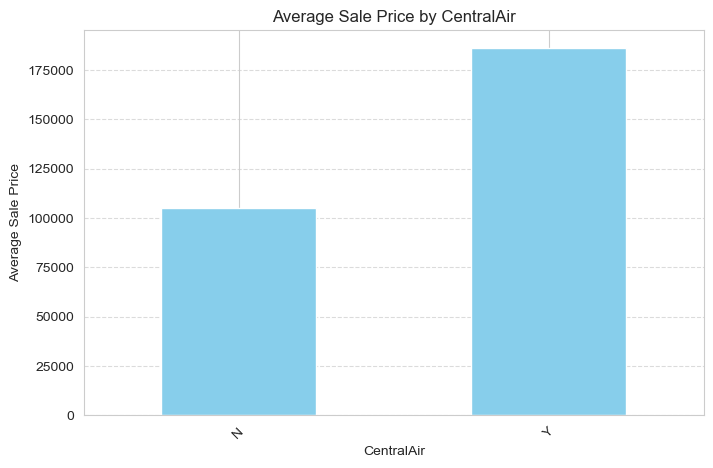

In [345]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_CentralAir_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('CentralAir')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by CentralAir')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [613]:
# Extract sorted neighborhood names
sorted_CentralAir= mean_CentralAir_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_CentralAir)

# Print in the required format
print(f"['{formatted}']")

['N', 'Y']


In [614]:
# Define the order based on SalePrice
CentralAir_order = ['N', 'Y']

encoder = OrdinalEncoder(categories=[CentralAir_order])
df['CentralAir'] = encoder.fit_transform(df[['CentralAir']])

print(df[["CentralAir"]].head())

   CentralAir
0         1.0
1         1.0
2         1.0
3         1.0
4         1.0


### Electrical

In [347]:
mean_Electrical_SalePrice = df.groupby('Electrical')['SalePrice'].mean().sort_values(ascending=True)
print(mean_Electrical_SalePrice)

Electrical
Mix       67000.000000
FuseP     97333.333333
FuseF    107675.444444
FuseA    122196.893617
SBrkr    186551.745304
Name: SalePrice, dtype: float64


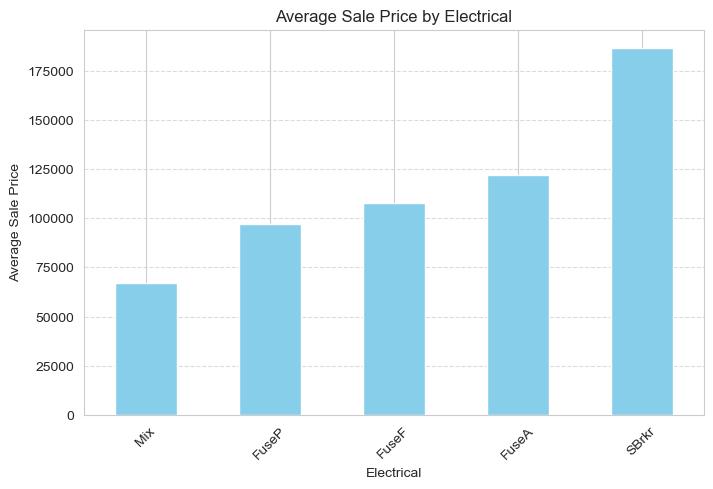

In [351]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Electrical_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Electrical')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Electrical')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [617]:
# Extract sorted neighborhood names
sorted_Electrical= mean_Electrical_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_Electrical)

# Print in the required format
print(f"['{formatted}']")

['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']


In [618]:
# Define the order based on SalePrice
Electrical_order = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']

encoder = OrdinalEncoder(categories=[Electrical_order])
df['Electrical'] = encoder.fit_transform(df[['Electrical']])

print(df[["Electrical"]].head())

   Electrical
0         4.0
1         4.0
2         4.0
3         4.0
4         4.0


### Kitchen Quality

In [355]:
mean_KitchenQual_SalePrice = df.groupby('KitchenQual')['SalePrice'].mean().sort_values(ascending=True)
print(mean_KitchenQual_SalePrice)

KitchenQual
Fa    105565.205128
TA    139962.511565
Gd    211697.872852
Ex    328554.670000
Name: SalePrice, dtype: float64


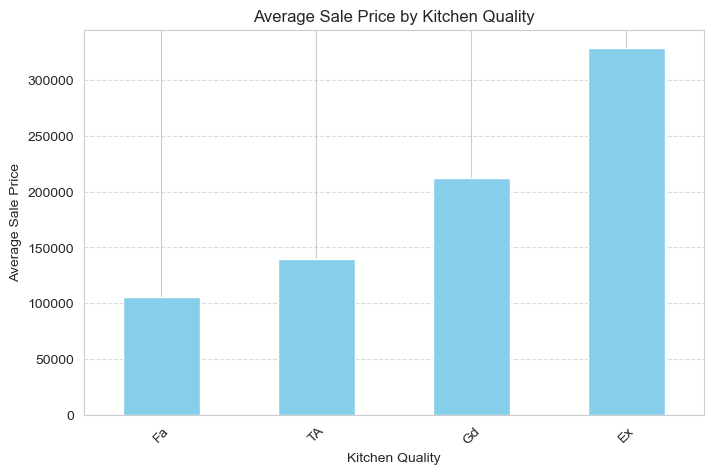

In [357]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_KitchenQual_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Kitchen Quality')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Kitchen Quality')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [621]:
# Extract sorted neighborhood names
sorted_KitchenQual= mean_KitchenQual_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_KitchenQual)

# Print in the required format
print(f"['{formatted}']")

['Fa', 'TA', 'Gd', 'Ex']


In [622]:
# Define the order based on SalePrice
KitchenQual_order = ['Fa', 'TA', 'Gd', 'Ex']

encoder = OrdinalEncoder(categories=[KitchenQual_order])
df['KitchenQual'] = encoder.fit_transform(df[['KitchenQual']])

print(df[["KitchenQual"]].head())

   KitchenQual
0          2.0
1          1.0
2          2.0
3          2.0
4          2.0


### Functional 

In [361]:
mean_Functional_SalePrice = df.groupby('Functional')['SalePrice'].mean().sort_values(ascending=True)
print(mean_Functional_SalePrice)

Functional
Maj2     85800.000000
Sev     129000.000000
Min2    144240.647059
Min1    146385.483871
Maj1    153948.142857
Mod     168393.333333
Typ     183165.053097
Name: SalePrice, dtype: float64


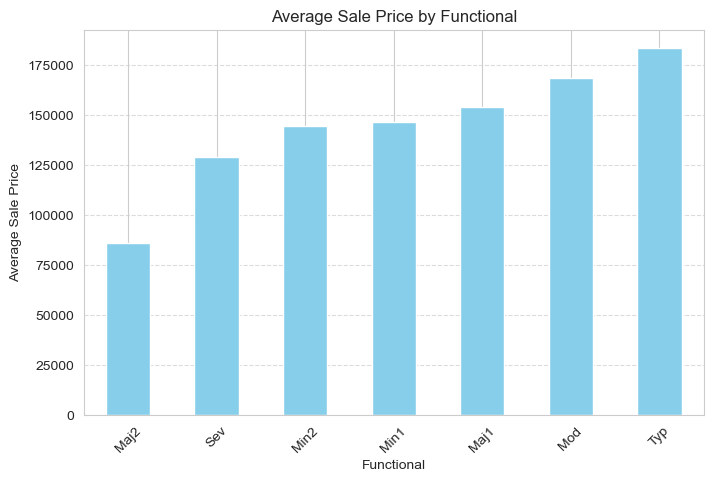

In [363]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Functional_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Functional')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Functional')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [625]:
# Extract sorted neighborhood names
sorted_Functional= mean_Functional_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_Functional)

# Print in the required format
print(f"['{formatted}']")

['Maj2', 'Sev', 'Min2', 'Min1', 'Maj1', 'Mod', 'Typ']


In [626]:
# Define the order based on SalePrice
Functional_order = ['Maj2', 'Sev', 'Min2', 'Min1', 'Maj1', 'Mod', 'Typ']

encoder = OrdinalEncoder(categories=[Functional_order])
df['Functional'] = encoder.fit_transform(df[['Functional']])

print(df[["Functional"]].head())

   Functional
0         6.0
1         6.0
2         6.0
3         6.0
4         6.0


### Fireplace Quality

In [367]:
mean_FireplaceQu_SalePrice = df.groupby('FireplaceQu')['SalePrice'].mean().sort_values(ascending=True)
print(mean_FireplaceQu_SalePrice)

FireplaceQu
Po      129764.150000
None    141137.928779
Fa      167298.484848
TA      205723.488818
Gd      225760.682540
Ex      337712.500000
Name: SalePrice, dtype: float64


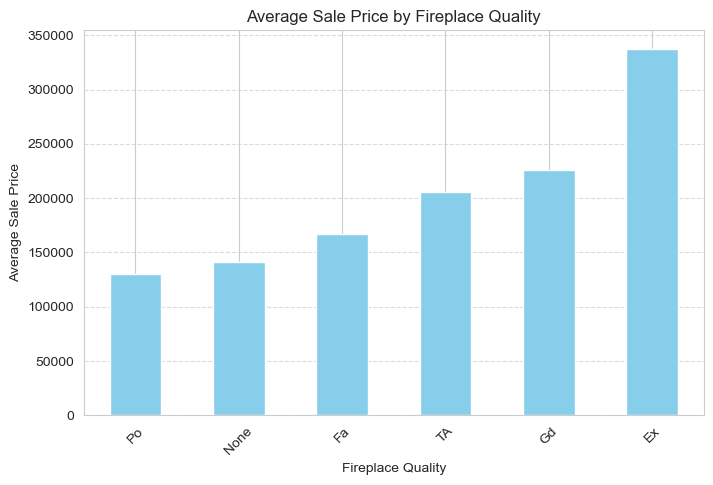

In [369]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_FireplaceQu_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Fireplace Quality')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Fireplace Quality')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [629]:
# Extract sorted neighborhood names
sorted_FireplaceQu= mean_FireplaceQu_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_FireplaceQu)

# Print in the required format
print(f"['{formatted}']")

['Po', 'None', 'Fa', 'TA', 'Gd', 'Ex']


In [630]:
# Define the order based on SalePrice
FireplaceQu_order = ['Po', 'None', 'Fa', 'TA', 'Gd', 'Ex']

encoder = OrdinalEncoder(categories=[FireplaceQu_order])
df['FireplaceQu'] = encoder.fit_transform(df[['FireplaceQu']])

print(df[["FireplaceQu"]].head())

   FireplaceQu
0          1.0
1          3.0
2          3.0
3          4.0
4          3.0


### Garage Type

In [373]:
mean_GarageType_SalePrice = df.groupby('GarageType')['SalePrice'].mean().sort_values(ascending=True)
print(mean_GarageType_SalePrice)

GarageType
None       103317.283951
CarPort    109962.111111
Detchd     134091.162791
2Types     151283.333333
Basment    160570.684211
Attchd     202528.584775
BuiltIn    255754.632184
Name: SalePrice, dtype: float64


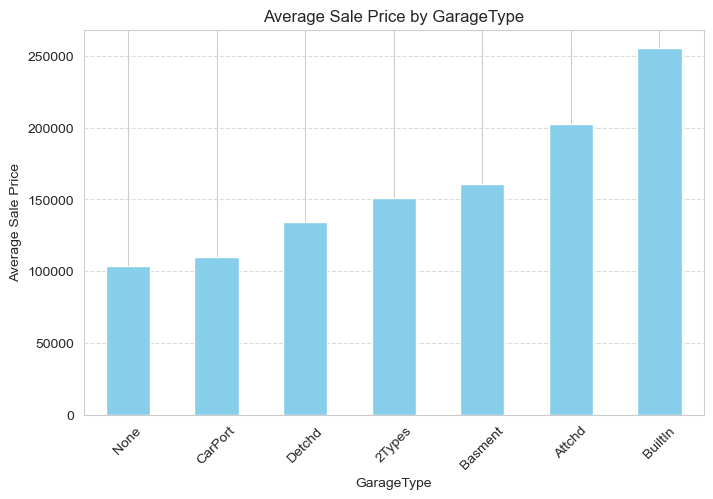

In [375]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_GarageType_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('GarageType')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by GarageType')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [633]:
# Extract sorted neighborhood names
sorted_GarageType= mean_GarageType_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_GarageType)

# Print in the required format
print(f"['{formatted}']")

['None', 'CarPort', 'Detchd', '2Types', 'Basment', 'Attchd', 'BuiltIn']


In [634]:
# Define the order based on SalePrice
GarageType_order = ['None', 'CarPort', 'Detchd', '2Types', 'Basment', 'Attchd', 'BuiltIn']

encoder = OrdinalEncoder(categories=[GarageType_order])
df['GarageType'] = encoder.fit_transform(df[['GarageType']])

print(df[["GarageType"]].head())

   GarageType
0         5.0
1         5.0
2         5.0
3         2.0
4         5.0


### Garage Finish

In [377]:
mean_GarageFinish_SalePrice = df.groupby('GarageFinish')['SalePrice'].mean().sort_values(ascending=True)
print(mean_GarageFinish_SalePrice)

GarageFinish
None    103317.283951
Unf     142156.423140
RFn     201309.630072
Fin     240259.393162
Name: SalePrice, dtype: float64


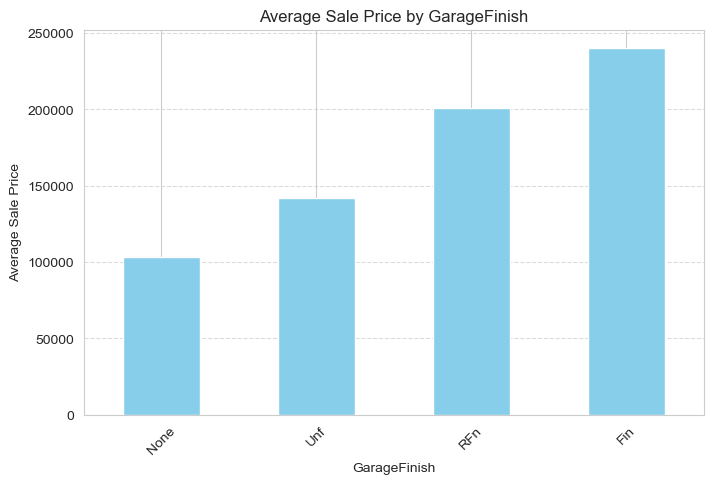

In [379]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_GarageFinish_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('GarageFinish')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by GarageFinish')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [637]:
# Extract sorted neighborhood names
sorted_GarageFinish= mean_GarageFinish_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_GarageFinish)

# Print in the required format
print(f"['{formatted}']")

['None', 'Unf', 'RFn', 'Fin']


In [638]:
# Define the order based on SalePrice
GarageFinish_order = ['None', 'Unf', 'RFn', 'Fin']

encoder = OrdinalEncoder(categories=[GarageFinish_order])
df['GarageFinish'] = encoder.fit_transform(df[['GarageFinish']])

print(df[["GarageFinish"]].head())

   GarageFinish
0           2.0
1           2.0
2           2.0
3           1.0
4           2.0


### Garace Quality

In [383]:
mean_GarageQual_SalePrice = df.groupby('GarageQual')['SalePrice'].mean().sort_values(ascending=True)
print(mean_GarageQual_SalePrice)

GarageQual
Po      100166.666667
None    103317.283951
Fa      123573.354167
TA      187228.268554
Gd      215860.714286
Ex      241000.000000
Name: SalePrice, dtype: float64


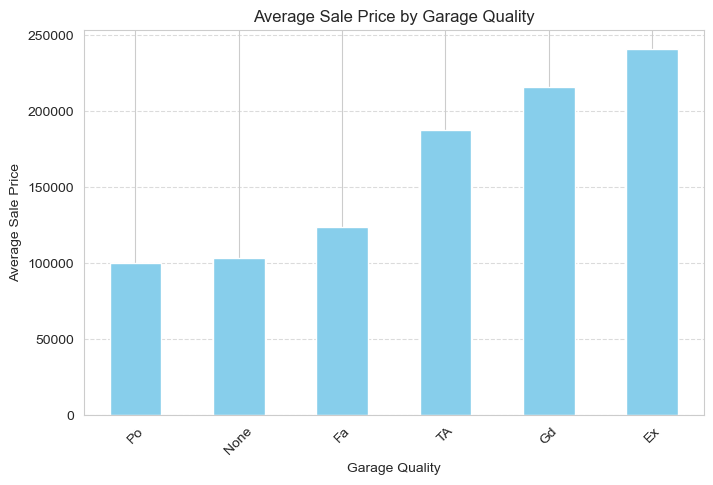

In [385]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_GarageQual_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Garage Quality')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Garage Quality')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [641]:
# Extract sorted neighborhood names
sorted_GarageQual= mean_GarageQual_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_GarageQual)

# Print in the required format
print(f"['{formatted}']")

['Po', 'None', 'Fa', 'TA', 'Gd', 'Ex']


In [642]:
# Define the order based on SalePrice
GarageQual_order = ['Po', 'None', 'Fa', 'TA', 'Gd', 'Ex']

encoder = OrdinalEncoder(categories=[GarageQual_order])
df['GarageQual'] = encoder.fit_transform(df[['GarageQual']])

print(df[["GarageQual"]].head())

   GarageQual
0         3.0
1         3.0
2         3.0
3         3.0
4         3.0


### Garage Condition 

In [391]:
mean_GarageCond_SalePrice = df.groupby('GarageCond')['SalePrice'].mean().sort_values(ascending=True)
print(mean_GarageCond_SalePrice)

GarageCond
None    103317.283951
Po      108500.000000
Fa      114654.028571
Ex      124000.000000
Gd      179930.000000
TA      187628.333585
Name: SalePrice, dtype: float64


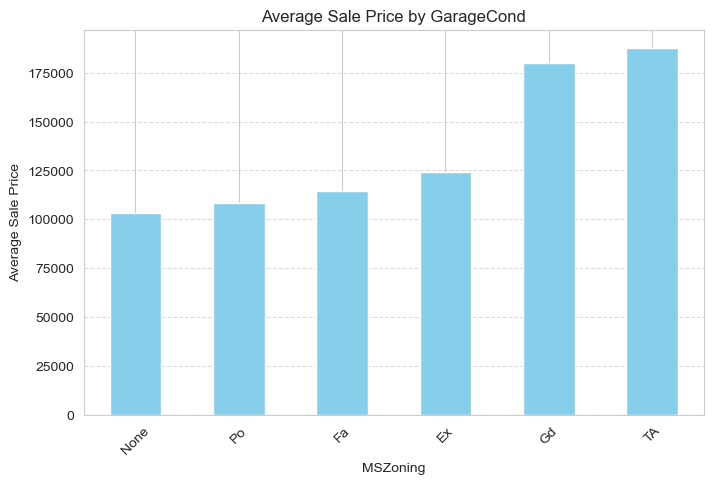

In [393]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_GarageCond_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('MSZoning')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by GarageCond')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [645]:
# Extract sorted neighborhood names
sorted_GarageCond= mean_GarageCond_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_GarageCond)

# Print in the required format
print(f"['{formatted}']")

['None', 'Po', 'Fa', 'Ex', 'Gd', 'TA']


In [646]:
# Define the order based on SalePrice
GarageCond_order = ['None', 'Po', 'Fa', 'Ex', 'Gd', 'TA']

encoder = OrdinalEncoder(categories=[GarageCond_order])
df['GarageCond'] = encoder.fit_transform(df[['GarageCond']])

print(df[["GarageCond"]].head())

   GarageCond
0         5.0
1         5.0
2         5.0
3         5.0
4         5.0


### Paved driveway

In [397]:
mean_PavedDrive_SalePrice = df.groupby('PavedDrive')['SalePrice'].mean().sort_values(ascending=True)
print(mean_PavedDrive_SalePrice)

PavedDrive
N    115039.122222
P    132330.000000
Y    186174.922904
Name: SalePrice, dtype: float64


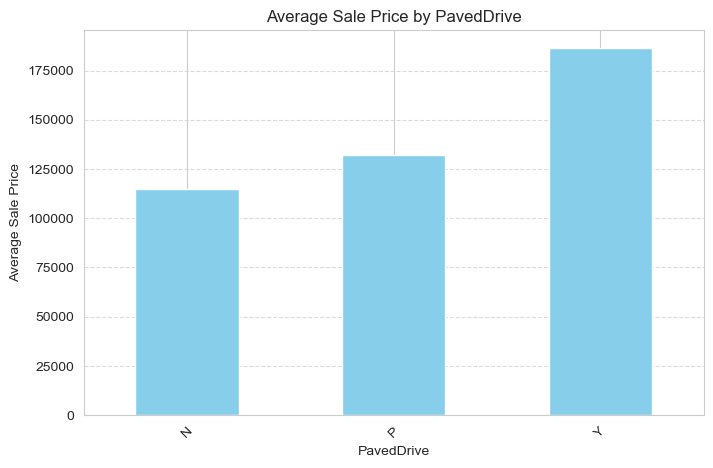

In [399]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_PavedDrive_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('PavedDrive')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by PavedDrive')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [649]:
# Extract sorted neighborhood names
sorted_PavedDrive= mean_PavedDrive_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_PavedDrive)

# Print in the required format
print(f"['{formatted}']")

['N', 'P', 'Y']


In [650]:
# Define the order based on SalePrice
PavedDrive_order = ['N', 'P', 'Y']

encoder = OrdinalEncoder(categories=[PavedDrive_order])
df['PavedDrive'] = encoder.fit_transform(df[['PavedDrive']])

print(df[["PavedDrive"]].head())

   PavedDrive
0         2.0
1         2.0
2         2.0
3         2.0
4         2.0


### Pool Quality

In [403]:
mean_PoolQC_SalePrice = df.groupby('PoolQC')['SalePrice'].mean().sort_values(ascending=True)
print(mean_PoolQC_SalePrice)

PoolQC
None    180149.170462
Gd      201990.000000
Fa      215500.000000
Ex      490000.000000
Name: SalePrice, dtype: float64


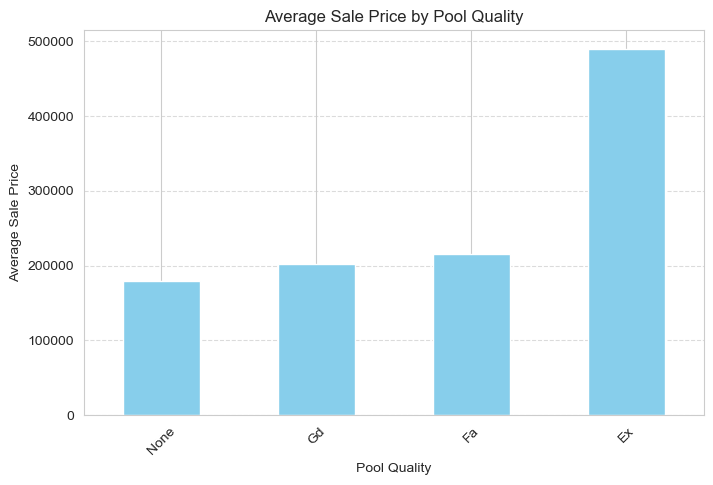

In [405]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_PoolQC_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Pool Quality')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Pool Quality')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [653]:
# Extract sorted neighborhood names
sorted_PoolQC= mean_PoolQC_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_PoolQC)

# Print in the required format
print(f"['{formatted}']")

['None', 'Gd', 'Fa', 'Ex']


In [654]:
# Define the order based on SalePrice
PoolQC_order = ['None', 'Gd', 'Fa', 'Ex']

encoder = OrdinalEncoder(categories=[PoolQC_order])
df['PoolQC'] = encoder.fit_transform(df[['PoolQC']])

print(df[["PoolQC"]].head())

   PoolQC
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0


### Fence Quality

In [409]:
mean_Fence_SalePrice = df.groupby('Fence')['SalePrice'].mean().sort_values(ascending=True)
print(mean_Fence_SalePrice)

Fence
MnWw     134286.363636
GdWo     140379.314815
MnPrv    148751.089172
GdPrv    178927.457627
None     187306.250213
Name: SalePrice, dtype: float64


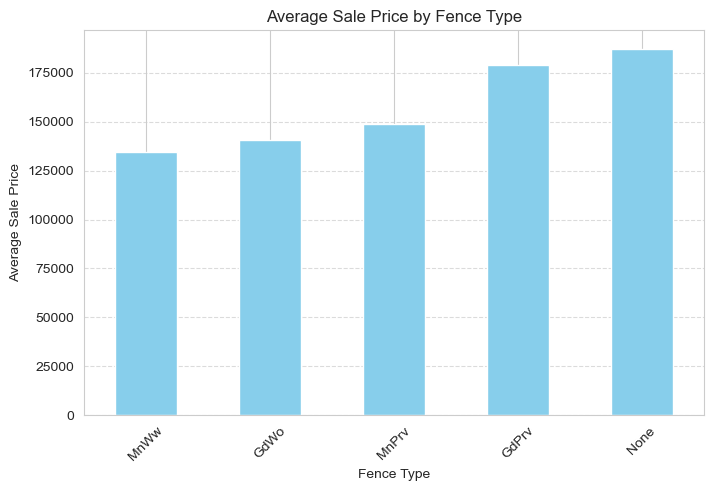

In [427]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Fence_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Fence Type')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Fence Type')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [657]:
# Extract sorted neighborhood names
sorted_Fence= mean_Fence_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_Fence)

# Print in the required format
print(f"['{formatted}']")

['MnWw', 'GdWo', 'MnPrv', 'GdPrv', 'None']


In [658]:
# Define the order based on SalePrice
Fence_order = ['MnWw', 'GdWo', 'MnPrv', 'GdPrv', 'None']

encoder = OrdinalEncoder(categories=[Fence_order])
df['Fence'] = encoder.fit_transform(df[['Fence']])

print(df[["Fence"]].head())

   Fence
0    4.0
1    4.0
2    4.0
3    4.0
4    4.0


### MiscFeature 

In [415]:
mean_MiscFeature_SalePrice = df.groupby('MiscFeature')['SalePrice'].mean().sort_values(ascending=True)
print(mean_MiscFeature_SalePrice)

MiscFeature
Othr     94000.000000
Shed    151187.612245
Gar2    170750.000000
None    181787.036377
TenC    250000.000000
Name: SalePrice, dtype: float64


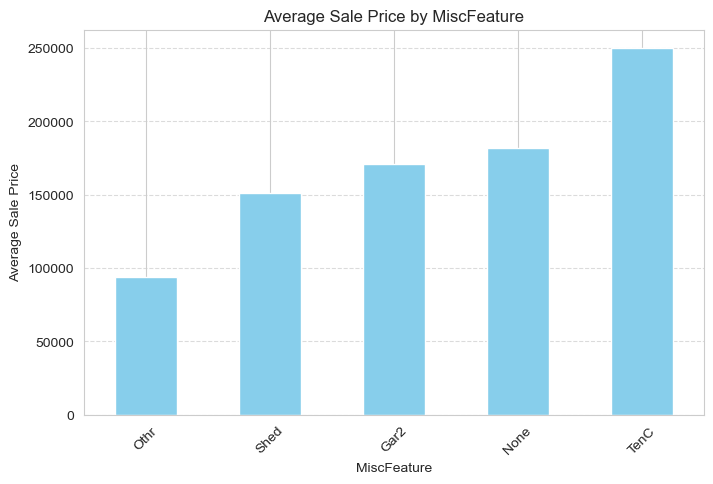

In [417]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_MiscFeature_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('MiscFeature')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by MiscFeature')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [661]:
# Extract sorted neighborhood names
sorted_MiscFeature= mean_MiscFeature_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_MiscFeature)

# Print in the required format
print(f"['{formatted}']")

['Othr', 'Shed', 'Gar2', 'None', 'TenC']


In [662]:
# Define the order based on SalePrice
MiscFeature_order = ['Othr', 'Shed', 'Gar2', 'None', 'TenC']

encoder = OrdinalEncoder(categories=[MiscFeature_order])
df['MiscFeature'] = encoder.fit_transform(df[['MiscFeature']])

print(df[["MiscFeature"]].head())

   MiscFeature
0          3.0
1          3.0
2          3.0
3          3.0
4          3.0


### Sale Type

In [421]:
mean_SaleType_SalePrice = df.groupby('SaleType')['SalePrice'].mean().sort_values(ascending=True)
print(mean_SaleType_SalePrice)

SaleType
Oth      119850.000000
ConLD    138780.888889
ConLw    143700.000000
COD      143973.255814
WD       173319.072727
ConLI    200390.000000
CWD      210600.000000
Con      269600.000000
New      274191.775000
Name: SalePrice, dtype: float64


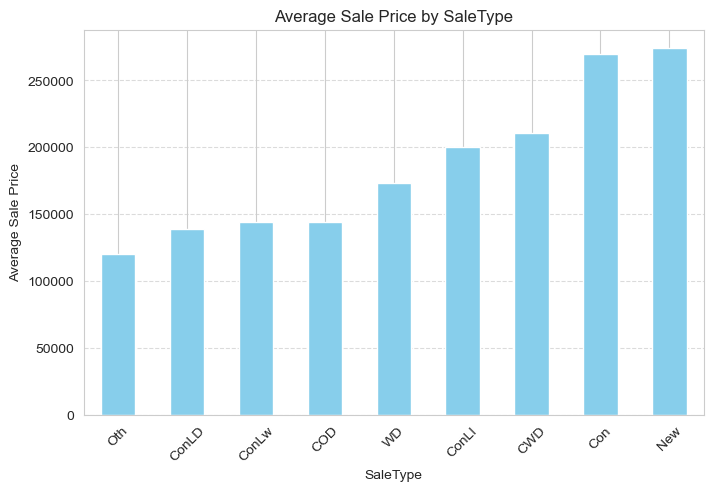

In [423]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_SaleType_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('SaleType')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by SaleType')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [665]:
# Extract sorted neighborhood names
sorted_SaleType= mean_SaleType_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_SaleType)

# Print in the required format
print(f"['{formatted}']")

['Oth', 'ConLD', 'ConLw', 'COD', 'WD', 'ConLI', 'CWD', 'Con', 'New']


In [666]:
# Define the order based on SalePrice
SaleType_order = ['Oth', 'ConLD', 'ConLw', 'COD', 'WD', 'ConLI', 'CWD', 'Con', 'New']

encoder = OrdinalEncoder(categories=[SaleType_order])
df['SaleType'] = encoder.fit_transform(df[['SaleType']])

print(df[["SaleType"]].head())

   SaleType
0       4.0
1       4.0
2       4.0
3       4.0
4       4.0


### Sale Condition

In [431]:
mean_SaleCondition_SalePrice = df.groupby('SaleCondition')['SalePrice'].mean().sort_values(ascending=True)
print(mean_SaleCondition_SalePrice)

SaleCondition
AdjLand    104125.000000
Abnorml    146526.623762
Family     149600.000000
Alloca     167377.416667
Normal     175117.691472
Partial    271513.341463
Name: SalePrice, dtype: float64


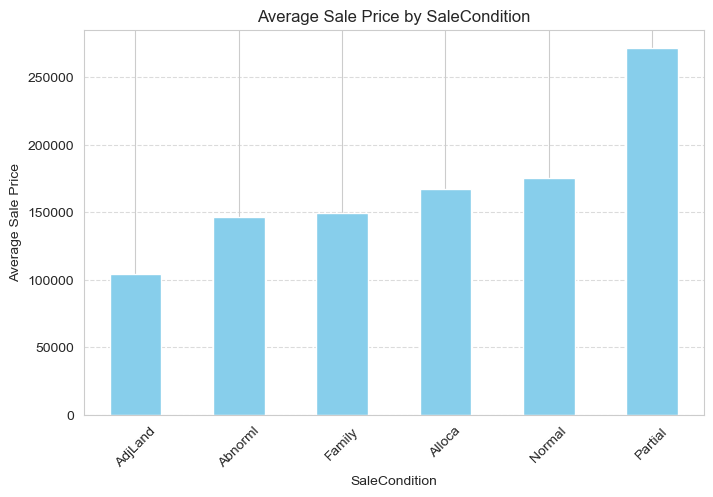

In [433]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_SaleCondition_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('SaleCondition')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by SaleCondition')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [669]:
# Extract sorted neighborhood names
sorted_SaleCondition= mean_SaleCondition_SalePrice.index.tolist()

# Format the names with single quotes
formatted = "', '".join(sorted_SaleCondition)

# Print in the required format
print(f"['{formatted}']")

['AdjLand', 'Abnorml', 'Family', 'Alloca', 'Normal', 'Partial']


In [670]:
# Define the order based on SalePrice
SaleCondition_order = ['AdjLand', 'Abnorml', 'Family', 'Alloca', 'Normal', 'Partial']

encoder = OrdinalEncoder(categories=[SaleCondition_order])
df['SaleCondition'] = encoder.fit_transform(df[['SaleCondition']])

print(df[["SaleCondition"]].head())

   SaleCondition
0            4.0
1            4.0
2            4.0
3            1.0
4            4.0


In [671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1456 non-null   int64  
 1   MSZoning            1456 non-null   float64
 2   LotFrontage         1456 non-null   float64
 3   LotArea             1456 non-null   int64  
 4   Street              1456 non-null   float64
 5   Alley               1456 non-null   float64
 6   LotShape            1456 non-null   float64
 7   LandContour         1456 non-null   float64
 8   Utilities           1456 non-null   float64
 9   LotConfig           1456 non-null   float64
 10  LandSlope           1456 non-null   float64
 11  Neighborhood        1456 non-null   float64
 12  Condition1          1456 non-null   float64
 13  Condition2          1456 non-null   float64
 14  BldgType            1456 non-null   float64
 15  HouseStyle          1456 non-null   float64
 16  OverallQual

# Feature Enginerring with EDA Approach

In [501]:
df['HouseAgeAtSale'] = df['YrSold'] - df['YearBuilt']

In [513]:
df['House_Age_Category'] = df['HouseAgeAtSale'].apply(lambda x: 'New' if x <= 10 else 'Old')

In [515]:
mean_HouseCategory_SalePrice = df.groupby('HouseCategory')['SalePrice'].mean().sort_values(ascending=True)
print(mean_HouseCategory_SalePrice)

HouseCategory
Old    156374.172515
New    238635.388372
Name: SalePrice, dtype: float64


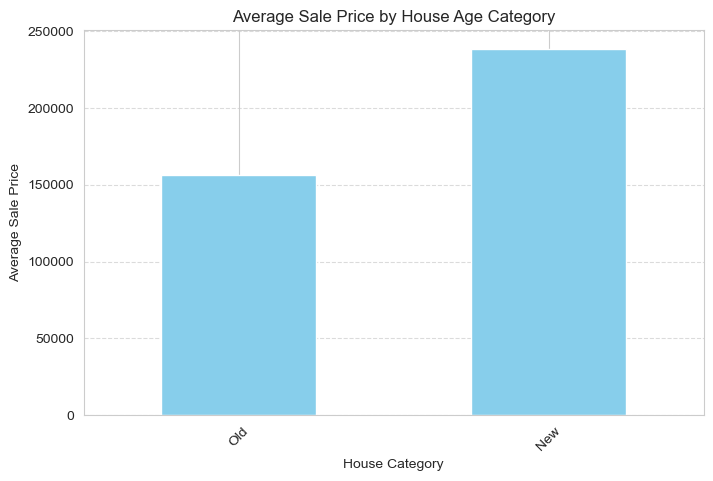

In [519]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_HouseCategory_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('House Category')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by House Age Category')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [675]:
# Define encoding order
df['HouseCategory'] = df['HouseCategory'].astype('category')

# Define encoding order (must be a list inside a list)
HouseCategory_order = [['Old', 'New']]

# Apply OrdinalEncoder
encoder = OrdinalEncoder(categories=HouseCategory_order)
df['HouseCategory'] = encoder.fit_transform(df[['HouseCategory']]) # Convert to int for readability

# Check result
print(df[['HouseCategory']].head())

   HouseCategory
0            1.0
1            0.0
2            1.0
3            0.0
4            1.0


In [523]:
df['Remodeled'] = (df['YearRemodAdd'] != df['YearBuilt']).astype("int64")

In [527]:
df['Remodeled'] = df['Remodeled'].map({1: 'Yes', 0: 'No'})

In [529]:
mean_Remodeled_SalePrice = df.groupby('Remodeled')['SalePrice'].mean().sort_values(ascending=True)
print(mean_Remodeled_SalePrice)

Remodeled
Yes    178961.85879
No     182222.55643
Name: SalePrice, dtype: float64


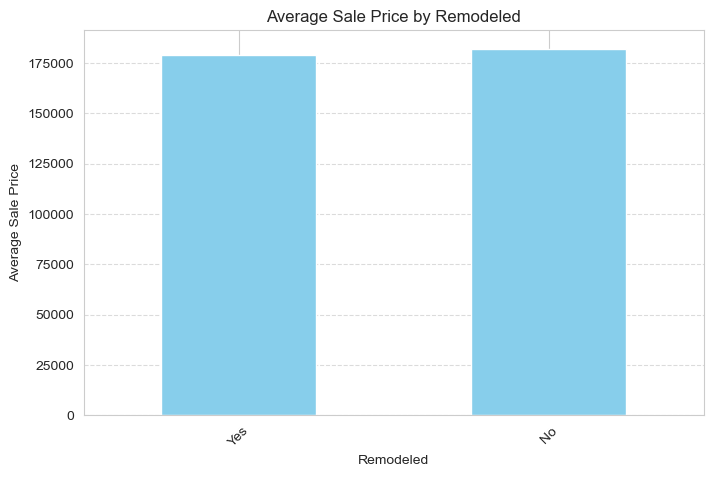

In [531]:
# Plot bar chart
plt.figure(figsize=(8,5))
mean_Remodeled_SalePrice.plot(kind='bar', color='skyblue')

# Labels and title
plt.xlabel('Remodeled')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Remodeled')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [533]:
df['Remodeled'] = df['Remodeled'].map({'Yes': 1, 'No': 0})

In [677]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MSSubClass          1456 non-null   int64  
 1   MSZoning            1456 non-null   float64
 2   LotFrontage         1456 non-null   float64
 3   LotArea             1456 non-null   int64  
 4   Street              1456 non-null   float64
 5   Alley               1456 non-null   float64
 6   LotShape            1456 non-null   float64
 7   LandContour         1456 non-null   float64
 8   Utilities           1456 non-null   float64
 9   LotConfig           1456 non-null   float64
 10  LandSlope           1456 non-null   float64
 11  Neighborhood        1456 non-null   float64
 12  Condition1          1456 non-null   float64
 13  Condition2          1456 non-null   float64
 14  BldgType            1456 non-null   float64
 15  HouseStyle          1456 non-null   float64
 16  OverallQual

In [678]:
#use total basement square feet instead
df = df.drop(columns=['BsmtFinSF1', 'BsmtFinSF2']) 

# Feature Selection

In [680]:
# Calculate correlation matrix for only numeric columns
corrmat = df.select_dtypes(include=['float64', 'int64']).corr()

# Extract correlations with SalePrice, sort them, and drop SalePrice itself
saleprice_corr = corrmat['SalePrice'].sort_values(ascending=False).drop('SalePrice')

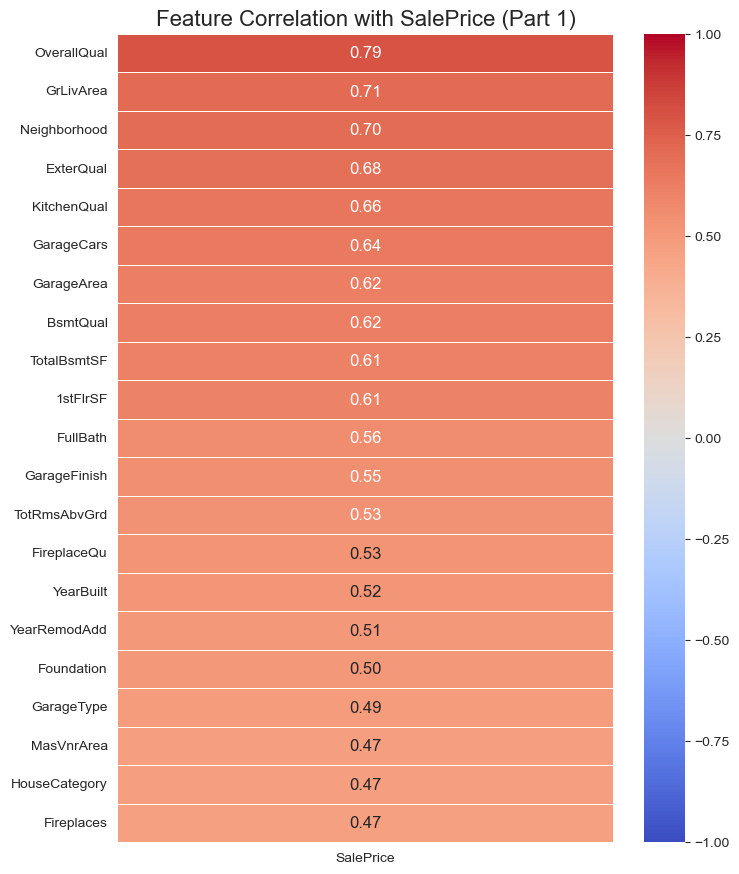

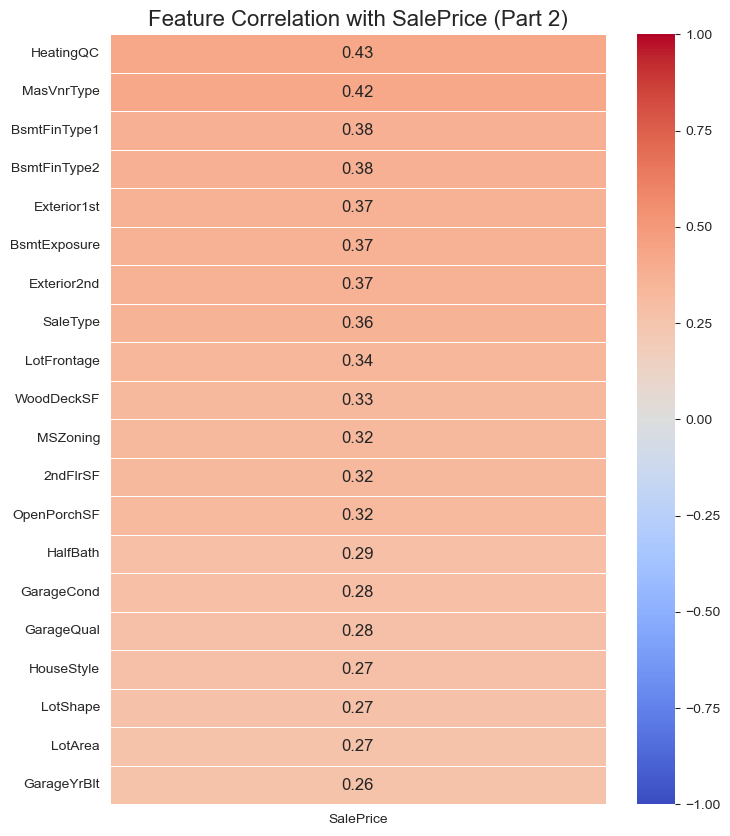

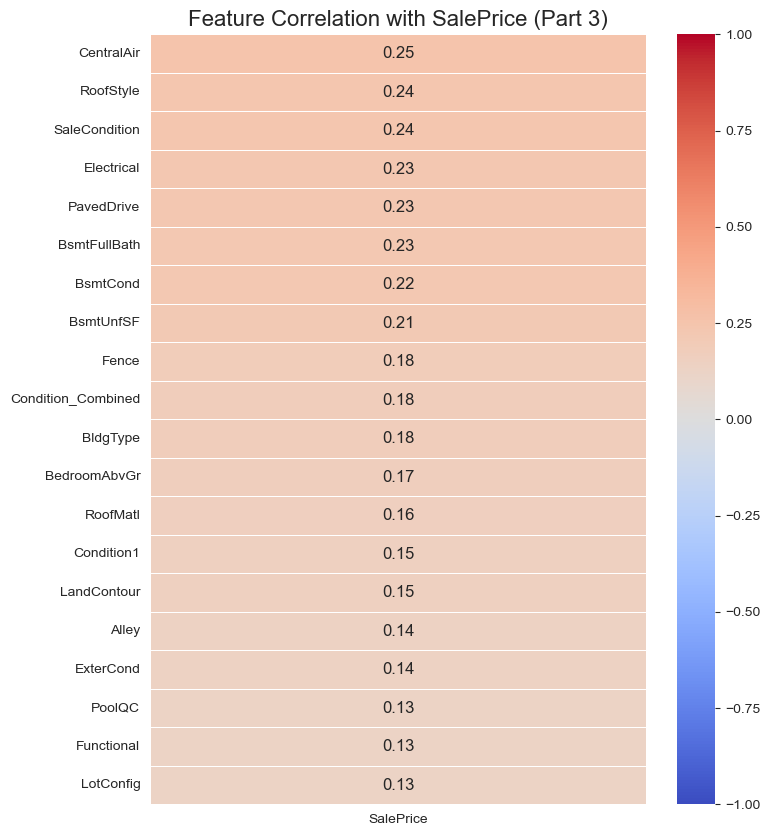

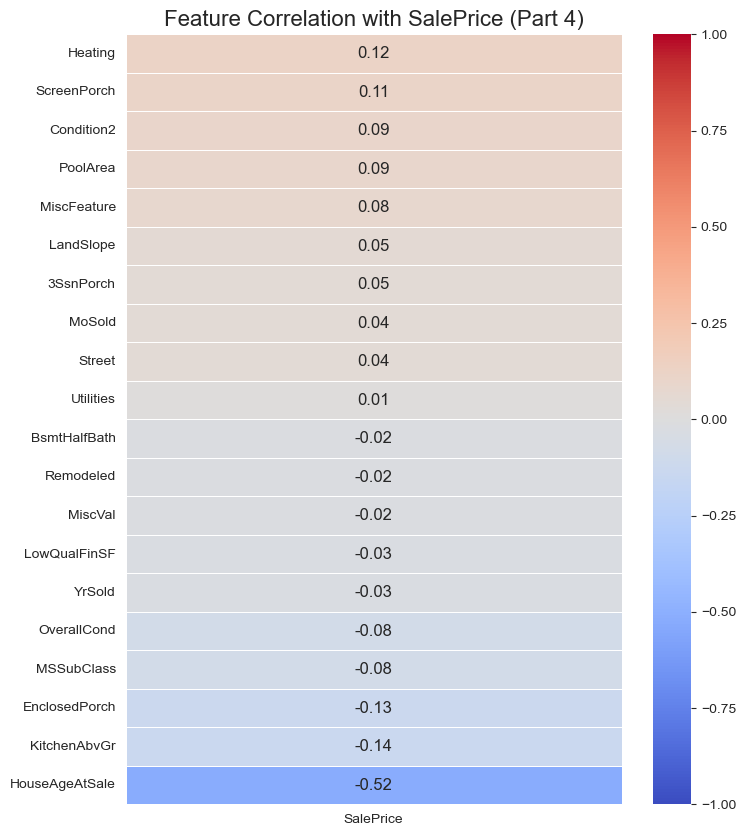

In [681]:
import numpy as np

# Split into 4 parts (20 features each)
num_splits = 4
feature_chunks = np.array_split(saleprice_corr.index, num_splits)

for i, chunk in enumerate(feature_chunks):
    plt.figure(figsize=(8, len(chunk) * 0.5))  # Adjust height dynamically
    sns.heatmap(saleprice_corr[chunk].to_frame(), annot=True, fmt=".2f", cmap="coolwarm",
                vmin=-1, vmax=1, annot_kws={"size": 12}, linewidths=0.5)
    plt.title(f"Feature Correlation with SalePrice (Part {i+1})", fontsize=16)
    plt.show()

In [682]:
#Combined Condition Better
df = df.drop(columns=['Condition1', 'Condition2'])

In [683]:
#Define Strong Correlation and Weak

strong_positive_corr = saleprice_corr[saleprice_corr > 0].index.tolist()
strong_negative_corr = saleprice_corr[saleprice_corr < 0].index.tolist()

print("Features positively correlated with SalePrice:", strong_positive_corr)

Features positively correlated with SalePrice: ['OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual', 'GarageCars', 'GarageArea', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu', 'YearBuilt', 'YearRemodAdd', 'Foundation', 'GarageType', 'MasVnrArea', 'HouseCategory', 'Fireplaces', 'HeatingQC', 'MasVnrType', 'BsmtFinType1', 'BsmtFinType2', 'Exterior1st', 'BsmtExposure', 'Exterior2nd', 'SaleType', 'LotFrontage', 'WoodDeckSF', 'MSZoning', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'GarageCond', 'GarageQual', 'HouseStyle', 'LotShape', 'LotArea', 'GarageYrBlt', 'CentralAir', 'RoofStyle', 'SaleCondition', 'Electrical', 'PavedDrive', 'BsmtFullBath', 'BsmtCond', 'BsmtUnfSF', 'Fence', 'Condition_Combined', 'BldgType', 'BedroomAbvGr', 'RoofMatl', 'Condition1', 'LandContour', 'Alley', 'ExterCond', 'PoolQC', 'Functional', 'LotConfig', 'Heating', 'ScreenPorch', 'Condition2', 'PoolArea', 'MiscFeature', 'LandSlope', '3SsnPorch', 'MoSold', 

In [684]:
print("Features negatively correlated with SalePrice:", strong_negative_corr)

Features negatively correlated with SalePrice: ['BsmtHalfBath', 'Remodeled', 'MiscVal', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr', 'HouseAgeAtSale']


In [685]:
#Feature Selection Based on Strong Correlation to SalePrice
df_modelling = df[['SalePrice', 'OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual', 'GarageCars', 'GarageArea', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu', 'YearBuilt', 'YearRemodAdd', 'Foundation', 'GarageType', 'MasVnrArea', 'HouseCategory', 'Fireplaces', 'HeatingQC', 'MasVnrType', 'BsmtFinType2', 'BsmtFinType1', 'Exterior1st', 'BsmtExposure', 'Exterior2nd', 'SaleType', 'LotFrontage', 'WoodDeckSF', 'MSZoning', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'GarageCond', 'GarageQual', 'HouseStyle', 'LotShape', 'LotArea', 'GarageYrBlt', 'CentralAir', 'RoofStyle', 'SaleCondition', 'Electrical', 'PavedDrive', 'BsmtFullBath', 'BsmtCond', 'BsmtUnfSF', 'Fence', 'Condition_Combined', 'BldgType', 'BedroomAbvGr', 'RoofMatl', 'LandContour', 'Alley', 'ExterCond', 'PoolQC', 'Functional', 'LotConfig', 'Heating', 'ScreenPorch', 'PoolArea', 'MiscFeature', 'LandSlope', '3SsnPorch', 'MoSold', 'Street', 'Utilities']]

In [924]:
df_modelling .info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           1456 non-null   int64  
 1   OverallQual         1456 non-null   int64  
 2   GrLivArea           1456 non-null   int64  
 3   Neighborhood        1456 non-null   float64
 4   ExterQual           1456 non-null   float64
 5   KitchenQual         1456 non-null   float64
 6   GarageCars          1456 non-null   int64  
 7   GarageArea          1456 non-null   int64  
 8   BsmtQual            1456 non-null   float64
 9   TotalBsmtSF         1456 non-null   int64  
 10  1stFlrSF            1456 non-null   int64  
 11  FullBath            1456 non-null   int64  
 12  GarageFinish        1456 non-null   float64
 13  TotRmsAbvGrd        1456 non-null   int64  
 14  FireplaceQu         1456 non-null   float64
 15  YearBuilt           1456 non-null   int64  
 16  YearRemodAd

# Modelling

## Optimized XGBOOST

### Add Features

In [926]:
# Define features (X) and target variable (Y)
X = df_modelling.drop(columns=['SalePrice'])  # Drop target variable
y = df_modelling['SalePrice']  # Target variable

### Split Data into Train, Test, val

In [929]:
# Split into train, validation, and test sets (80% train, 10% val, 10% test)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")

Train shape: (1164, 69), Validation shape: (146, 69), Test shape: (146, 69)


### Define the search space for hyperparameters

In [932]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,  # Reduce depth
    'min_child_weight': 5,  # Prevent small node splits
    'subsample': 0.8,  # Use 80% of data per tree
    'colsample_bytree': 0.8,  # Use 80% of features
    'learning_rate': 0.001,  # Reduce learning rate
    'n_estimators': 500,  # Control boosting rounds
    'random_state': 42,
    'reg_alpha': 0.1,  # L1 regularization (Lasso)
    'reg_lambda': 0.5  # L2 regularization (Ridge)
}
# Initialize the XGBoost Regressor
xgb_reg = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up Bayesian Optimization
bayes_search = BayesSearchCV(
    xgb_reg,
    param_space,
    n_iter=50,  # Number of optimization steps
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Optimize for R²
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)

# Perform hyperparameter tuning
bayes_search.fit(X_train, Y_train)

# Print the best hyperparameters
best_params = bayes_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: OrderedDict({'colsample_bytree': 0.5, 'gamma': 5.0, 'learning_rate': 0.03522934929764733, 'max_depth': 3, 'n_estimators': 410, 'reg_alpha': 4.975372631193469, 'reg_lambda': 0.0, 'subsample': 1.0})


### Run the Optimized XGBOOST Model

In [934]:
import xgboost as xgb

# Convert data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=Y_train)
dval = xgb.DMatrix(X_val, label=Y_val)

# Set parameters (remove 'n_estimators' if it exists)
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'random_state': 42,
    **best_params
}

# Remove 'n_estimators' if it exists in best_params
params.pop("n_estimators", None)

# Define validation sets
evals = [(dtrain, 'train'), (dval, 'eval')]

# Use num_boost_round instead of n_estimators
num_boost_round = best_params.get("n_estimators", 500)  # Default to 500 if missing

# Train with early stopping
optimized_xgb = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds=50,  # Stop if no improvement in 50 rounds
    verbose_eval=10
)

# ✅ Get the best iteration safely
best_iteration = getattr(optimized_xgb, "best_iteration", num_boost_round)

print(f"Best Iteration: {best_iteration}")

[0]	train-rmse:78376.27506	eval-rmse:70279.44068
[10]	train-rmse:61583.05747	eval-rmse:56206.79867
[20]	train-rmse:49369.64772	eval-rmse:45782.20501
[30]	train-rmse:40737.72918	eval-rmse:38933.40582
[40]	train-rmse:34429.72544	eval-rmse:34515.51745
[50]	train-rmse:29939.67976	eval-rmse:31068.05906
[60]	train-rmse:26661.47879	eval-rmse:29419.86649
[70]	train-rmse:24244.94601	eval-rmse:27984.81888
[80]	train-rmse:22422.40999	eval-rmse:27078.95577
[90]	train-rmse:21009.80199	eval-rmse:26154.01104
[100]	train-rmse:19885.32666	eval-rmse:25692.61055
[110]	train-rmse:18935.91092	eval-rmse:25235.90878
[120]	train-rmse:18196.50811	eval-rmse:25172.86249
[130]	train-rmse:17581.86035	eval-rmse:25063.49404
[140]	train-rmse:17102.23871	eval-rmse:25009.30546
[150]	train-rmse:16682.01089	eval-rmse:24523.75527
[160]	train-rmse:16314.21343	eval-rmse:24514.72109
[170]	train-rmse:15977.34165	eval-rmse:24314.99490
[180]	train-rmse:15646.25214	eval-rmse:24237.75875
[190]	train-rmse:15365.54116	eval-rmse:242

### Model Evaluation

In [936]:
# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train)
dval = xgb.DMatrix(X_val)
dtest = xgb.DMatrix(X_test)

# Generate predictions
y_train_pred = optimized_xgb.predict(dtrain)
y_val_pred = optimized_xgb.predict(dval)
y_test_pred = optimized_xgb.predict(dtest)

# Evaluate model
evaluate_model(Y_train, y_train_pred, "Training")
evaluate_model(Y_val, y_val_pred, "Validation")
evaluate_model(Y_test, y_test_pred, "Test")


🔹 Training Set Evaluation:
  - Mean Absolute Error (MAE): 10750.4189
  - Mean Squared Error (MSE): 202760594.9231
  - Root Mean Squared Error (RMSE): 14239.4029
  - R² Score: 0.9687

🔹 Validation Set Evaluation:
  - Mean Absolute Error (MAE): 16004.2570
  - Mean Squared Error (MSE): 586325576.6157
  - Root Mean Squared Error (RMSE): 24214.1607
  - R² Score: 0.8836

🔹 Test Set Evaluation:
  - Mean Absolute Error (MAE): 16144.9474
  - Mean Squared Error (MSE): 546377269.5154
  - Root Mean Squared Error (RMSE): 23374.7143
  - R² Score: 0.9063


In [937]:
from sklearn.metrics import mean_absolute_percentage_error

def calculate_mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

# Predictions
y_train_pred = optimized_xgb.predict(dtrain)
y_val_pred = optimized_xgb.predict(dval)
y_test_pred = optimized_xgb.predict(xgb.DMatrix(X_test))  # Convert X_test to DMatrix

# Compute MAPE
train_mape = calculate_mape(Y_train, y_train_pred)
val_mape = calculate_mape(Y_val, y_val_pred)
test_mape = calculate_mape(Y_test, y_test_pred)

# Print results
print(f"🔹 Training MAPE: {train_mape:.2%}")
print(f"🔹 Validation MAPE: {val_mape:.2%}")
print(f"🔹 Test MAPE: {test_mape:.2%}")

🔹 Training MAPE: 6.72%
🔹 Validation MAPE: 10.57%
🔹 Test MAPE: 8.85%


In [938]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Define XGBoost model with L1 (alpha) and L2 (lambda) regularization
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    max_depth=6,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,  # L1 regularization (Lasso)
    reg_lambda=0.5,  # L2 regularization (Ridge)
    random_state=42
)

# Perform 5-fold Cross-Validation
cv_scores = cross_val_score(xgb_model, X_train, Y_train, cv=5, scoring="r2")

# Print results
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f}")

Cross-Validation R² Scores: [0.80315626 0.90780061 0.91896081 0.88779938 0.87445271]
Mean CV R²: 0.8784


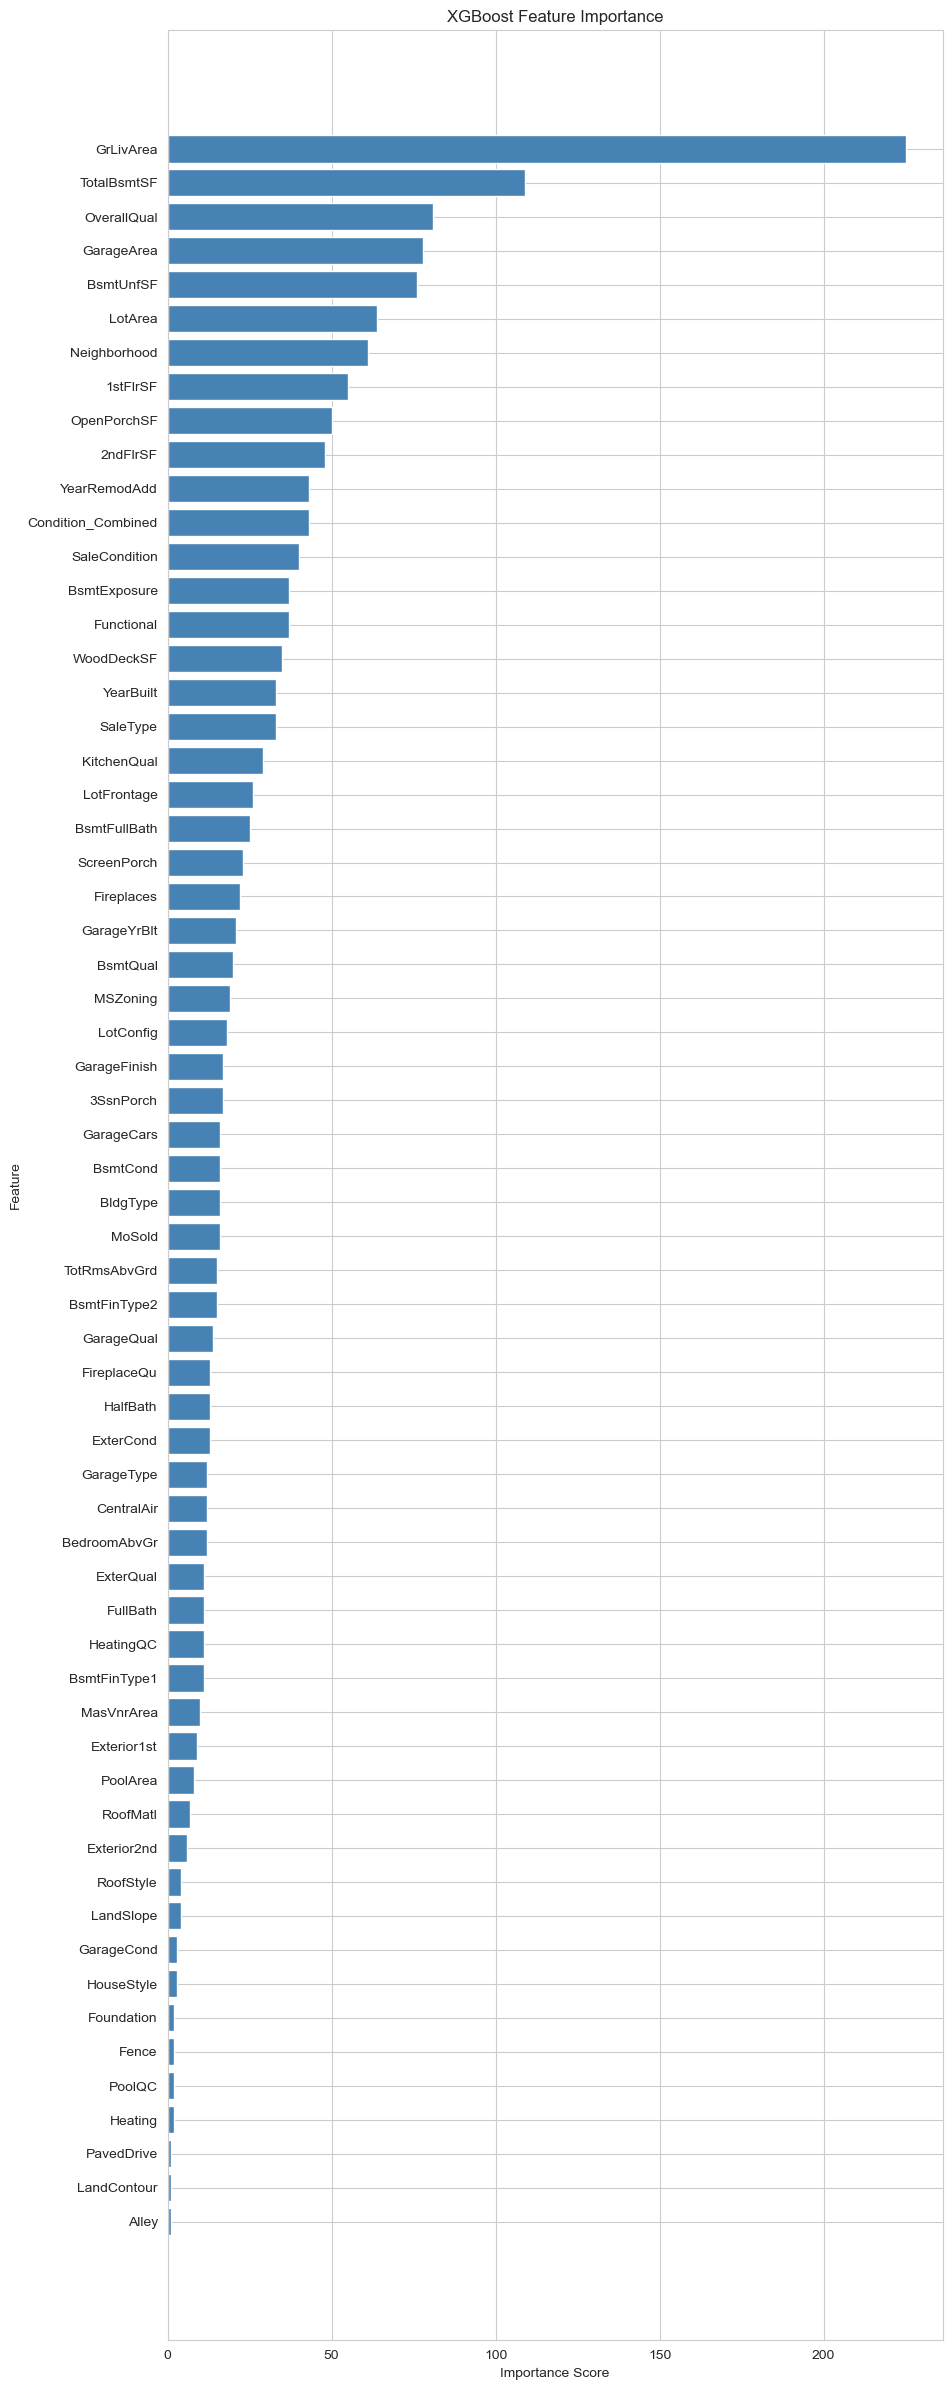

In [940]:
import matplotlib.pyplot as plt

# Get feature importance
importance = optimized_xgb.get_score(importance_type='weight')  # Options: 'weight', 'gain', 'cover'

# Convert to sorted list
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Plot Feature Importance
plt.figure(figsize=(10, 30))
plt.barh([x[0] for x in sorted_importance], [x[1] for x in sorted_importance], color="steelblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Highest at the top
plt.show()

## Optimized Random Forest Regressor

### Split Data into Train Test Val

In [947]:
#feature is same as XGBOOST

from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

### Define Metrics

In [949]:
from sklearn.metrics import mean_absolute_percentage_error

def MAPE(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

### Define Search Parameters

In [999]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Define the hyperparameter search space
search_space = {
    "n_estimators": (100, 300),  # Reduce the number of trees slightly
    "max_depth": (4, 10),  # Reduce tree depth to prevent overfitting
    "min_samples_split": (5, 15),  # Increase to prevent overly small splits
    "min_samples_leaf": (3, 10),  # Higher values prevent overfitting by enforcing larger leaves
    "max_features": ["sqrt", "log2"],  # Remove `None` to ensure feature selection
    "bootstrap": [True],  # Always use bootstrap to improve generalization
}

# Bayesian Optimization
bayes_search = BayesSearchCV(
    rf_reg,
    search_space,
    n_iter=30,  # Number of search iterations
    cv=5,  # 5-fold cross-validation
    scoring="r2",  # Use R² as the evaluation metric
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)

# Fit the model with Bayesian optimization
bayes_search.fit(X_train, Y_train)

# Print the best hyperparameters
best_params = bayes_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: OrderedDict({'bootstrap': True, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100})


### Run the Optimized Random Forest Regressor

In [1000]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Convert to percentage

# Train the optimized model
optimized_rf = RandomForestRegressor(random_state=42, **best_params)
optimized_rf.fit(X_train, Y_train)

# Make predictions
Y_pred = optimized_rf.predict(X_val)

# Evaluate the model using MAPE
mape_score = MAPE(Y_val, Y_pred)
print(f"📌 Mean Absolute Percentage Error (MAPE): {mape_score:.2f}%")

📌 Mean Absolute Percentage Error (MAPE): 10.90%


### Model Evaluations

In [1001]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to compute RMSE, MAE, and MAPE safely
def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    
    # Handle zero values in y_true for MAPE calculation
    nonzero_indices = y_true != 0
    mape = (abs(y_true[nonzero_indices] - y_pred[nonzero_indices]) / y_true[nonzero_indices]).mean() * 100
    
    print(f"\n🔹 {dataset_name} Evaluation:")
    print(f"  - Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  - Mean Squared Error (MSE): {mse:.4f}")
    print(f"  - Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  - Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# ✅ Predictions for all datasets
y_train_pred = optimized_rf.predict(X_train)
y_val_pred = optimized_rf.predict(X_val)
y_test_pred = optimized_rf.predict(X_test)

# ✅ Evaluate each set
evaluate_model(Y_train, y_train_pred, "Training")
evaluate_model(Y_val, y_val_pred, "Validation")
evaluate_model(Y_test, y_test_pred, "Test")


🔹 Training Evaluation:
  - Mean Absolute Error (MAE): 11871.5230
  - Mean Squared Error (MSE): 394365286.0112
  - Root Mean Squared Error (RMSE): 19858.6325
  - Mean Absolute Percentage Error (MAPE): 7.23%

🔹 Validation Evaluation:
  - Mean Absolute Error (MAE): 17530.4885
  - Mean Squared Error (MSE): 748644024.3593
  - Root Mean Squared Error (RMSE): 27361.3601
  - Mean Absolute Percentage Error (MAPE): 10.90%

🔹 Test Evaluation:
  - Mean Absolute Error (MAE): 17474.4955
  - Mean Squared Error (MSE): 638263118.5641
  - Root Mean Squared Error (RMSE): 25263.8698
  - Mean Absolute Percentage Error (MAPE): 10.01%


In [1002]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_r2_scores = cross_val_score(optimized_rf, X_train, Y_train, cv=kf, scoring="r2")
cv_rmse_scores = np.sqrt(-cross_val_score(optimized_rf, X_train, Y_train, cv=kf, scoring="neg_mean_squared_error"))
cv_mae_scores = -cross_val_score(optimized_rf, X_train, Y_train, cv=kf, scoring="neg_mean_absolute_error")

# Compute Cross-Validation MAPE
cv_y_pred = cross_val_predict(optimized_rf, X_train, Y_train, cv=kf)
cv_mape = mean_absolute_percentage_error(Y_train, cv_y_pred)

# ✅ Print Cross-Validation Results
print("\n🔹 Cross-Validation Results:")
print(f"  - R² Scores: {cv_r2_scores}")
print(f"  - Mean CV R²: {cv_r2_scores.mean():.4f}")
print(f"  - RMSE Scores: {cv_rmse_scores}")
print(f"  - Mean CV RMSE: {cv_rmse_scores.mean():.4f}")
print(f"  - MAE Scores: {cv_mae_scores}")
print(f"  - Mean CV MAE: {cv_mae_scores.mean():.4f}")


🔹 Cross-Validation Results:
  - R² Scores: [0.89579222 0.89328251 0.84168564 0.87342813 0.82182612]
  - Mean CV R²: 0.8652
  - RMSE Scores: [21412.59816547 23489.58120653 34406.27513836 28883.93221684
 39379.64034202]
  - Mean CV RMSE: 29514.4054
  - MAE Scores: [15270.65755864 15684.49595984 18622.20518335 17788.57480232
 20457.37807571]
  - Mean CV MAE: 17564.6623


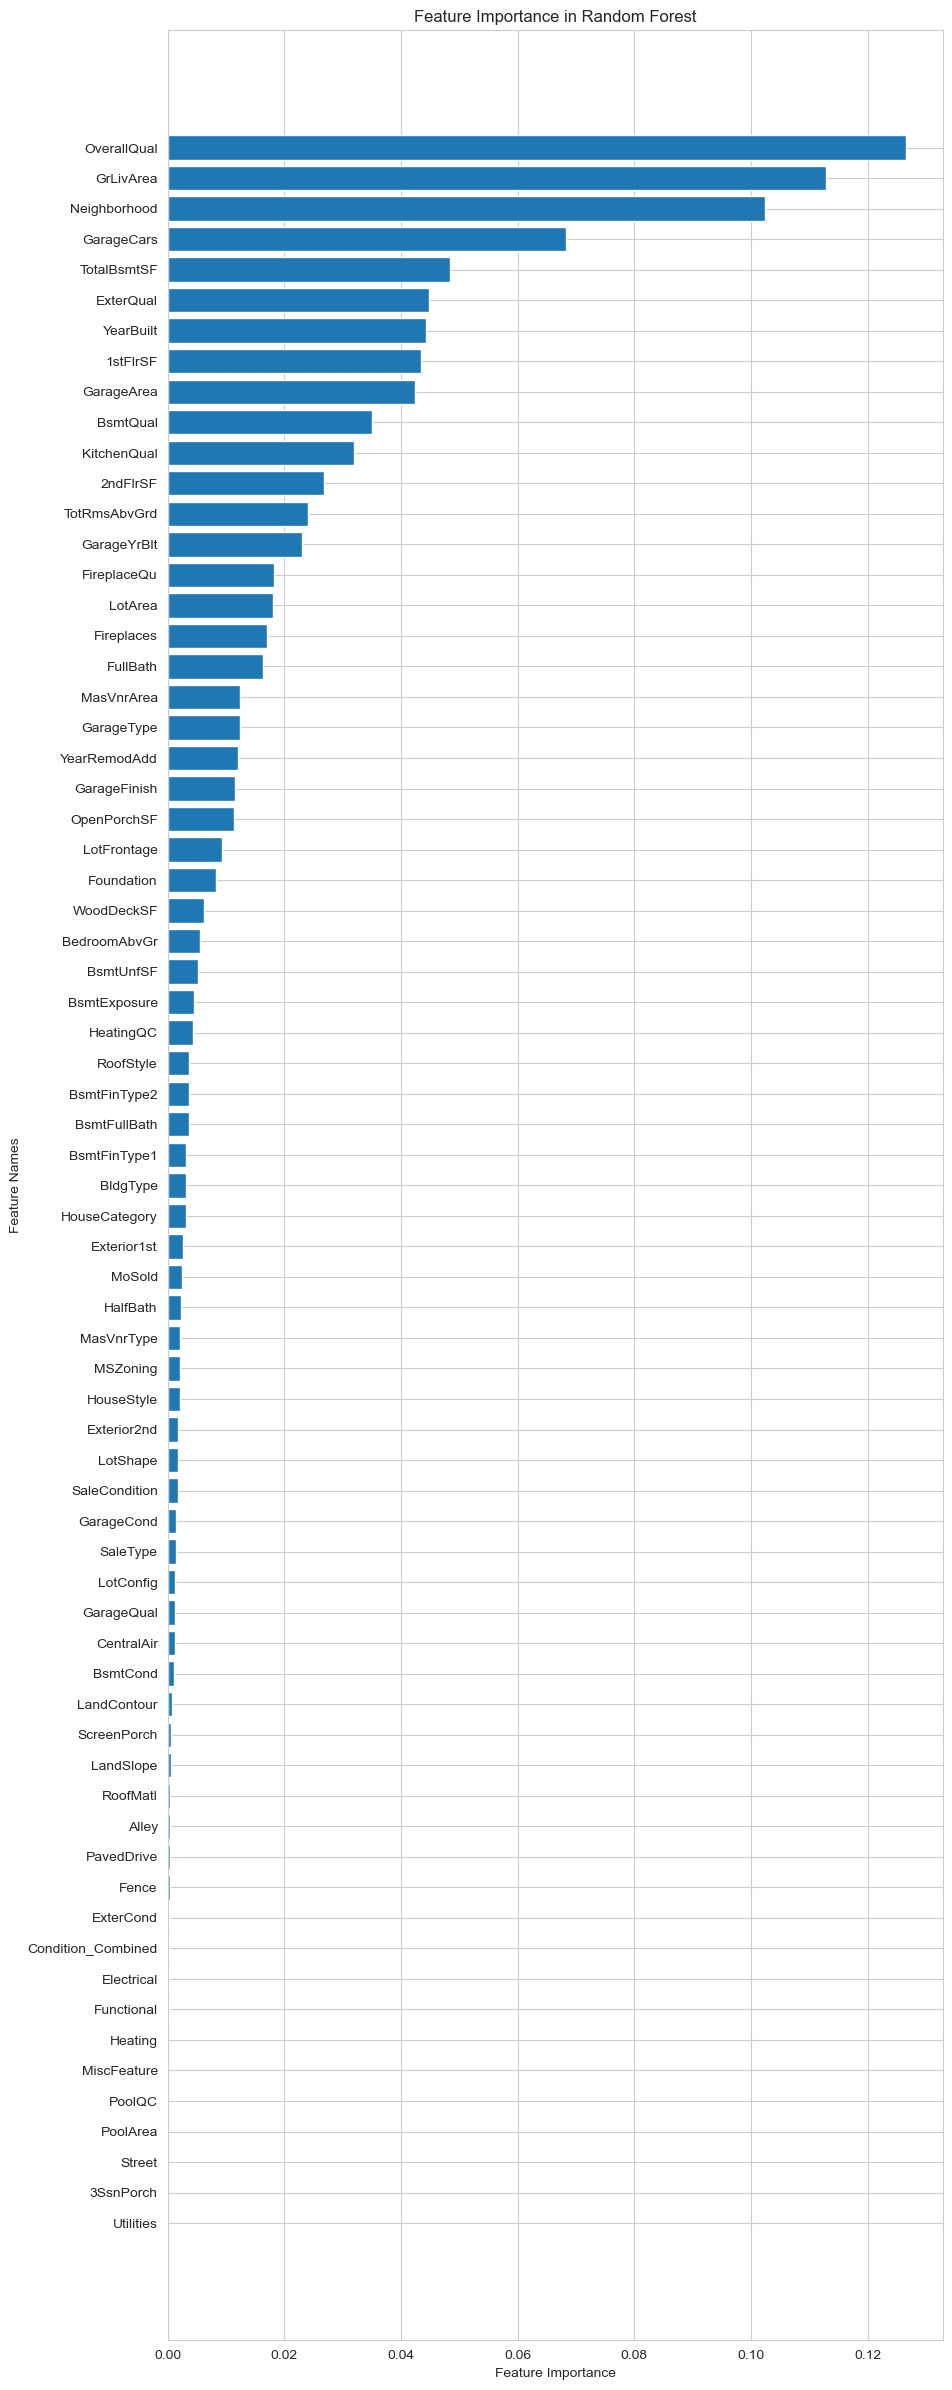

In [1003]:
# Get feature importance
feature_importances = optimized_rf.feature_importances_
feature_names = X_train.columns  # Assuming X is a Pandas DataFrame

# Sort feature importance
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 30))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in Random Forest")
plt.show()

## Linear Regression

In [912]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Predict on validation data
Y_pred = lr_model.predict(X_val)

In [916]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Compute error metrics using sklearn
mae = mean_absolute_error(Y_val, Y_pred)
mse = mean_squared_error(Y_val, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_val, Y_pred) * 100  # Convert to percentage
r2 = r2_score(Y_val, Y_pred)

# Print results
print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"📌 R² Score: {r2:.4f}")

📌 Mean Absolute Error (MAE): 26543.98
📌 Mean Squared Error (MSE): 3120922073.55
📌 Root Mean Squared Error (RMSE): 55865.21
📌 Mean Absolute Percentage Error (MAPE): 17.21%
📌 R² Score: 0.3806
